In [144]:
import pandas as pd
from matplotlib import *
from plotnine import *
from sklearn.preprocessing import StandardScaler
from collections import Counter
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
art = pd.read_csv("updated_combined_artists.csv")
art.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,212600,70,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,4,Taylor Swift
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,231833,71,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,4,Taylor Swift
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,231000,73,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,4,Taylor Swift
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,235800,71,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,4,Taylor Swift
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,193289,70,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,4,Taylor Swift


In [12]:
# country
country = art[(art["artist"] == 'Luke Combs') | (art["artist"] == 'Morgan Wallace') | 
    (art["artist"] == 'Zach Bryan') | (art['album']== 'Fearless') | (art['album']== 'Speak Now')]

country.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
461,Mine,Speak Now,2010-10-25,230706,61,0.00265,0.624,0.757,0.000002,0.1890,-2.940,0.0296,121.070,4,Taylor Swift
462,Sparks Fly,Speak Now,2010-10-25,260933,60,0.03960,0.605,0.787,0.000001,0.1630,-3.002,0.0308,114.987,4,Taylor Swift
463,Back To December,Speak Now,2010-10-25,293026,64,0.11700,0.529,0.670,0.000000,0.3340,-4.663,0.0303,141.893,4,Taylor Swift
464,Speak Now,Speak Now,2010-10-25,240760,55,0.09500,0.709,0.599,0.000000,0.0973,-3.734,0.0304,118.975,4,Taylor Swift
465,Dear John,Speak Now,2010-10-25,403920,53,0.16600,0.589,0.470,0.000001,0.1120,-5.320,0.0280,119.386,3,Taylor Swift


In [146]:
# pop
pop = art[(art["artist"] == 'Olivia Rodrigo') | (art["artist"] == 'Doja Cat') | 
    (art["artist"] == 'Miley Cyrus') | (art['album']== '1989') | 
          (art['album']== 'Lover') | (art['album']== 'Reputation') | (art['album']== 'Folklore')
         | (art['album']== "Red (Taylor's Version)") | (art['album']== 'Midnights') ]

pop.head()

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
108,Lavender Haze,Midnights,2022-10-21,202395,84,0.2580,0.733,0.436,0.000573,0.157,-10.489,0.0800,96.985,4,Taylor Swift
109,Maroon,Midnights,2022-10-21,218270,79,0.0573,0.637,0.398,0.000001,0.101,-8.294,0.0564,108.075,4,Taylor Swift
110,Anti-Hero,Midnights,2022-10-21,200690,93,0.1300,0.637,0.643,0.000002,0.142,-6.571,0.0519,97.008,4,Taylor Swift
111,Snow On The Beach (feat. Lana Del Rey),Midnights,2022-10-21,256124,77,0.6900,0.663,0.319,0.000993,0.117,-13.481,0.0375,109.957,4,Taylor Swift
112,"You're On Your Own, Kid",Midnights,2022-10-21,194206,85,0.4010,0.696,0.396,0.000005,0.125,-10.289,0.0656,120.041,4,Taylor Swift


## Graphs

In [38]:
def spot_features (feature):

    df = pop.groupby('artist').agg({feature: 'mean'}).reset_index()

    plot = (ggplot(df, aes(x = 'artist', y= feature, fill = 'artist'))
    + geom_col()
    + geom_text(aes(label=feature), va='bottom', format_string='{:.3f}')
    + labs(
        x = 'artist',
        y = feature,
        title = feature
    ))
    
    return plot

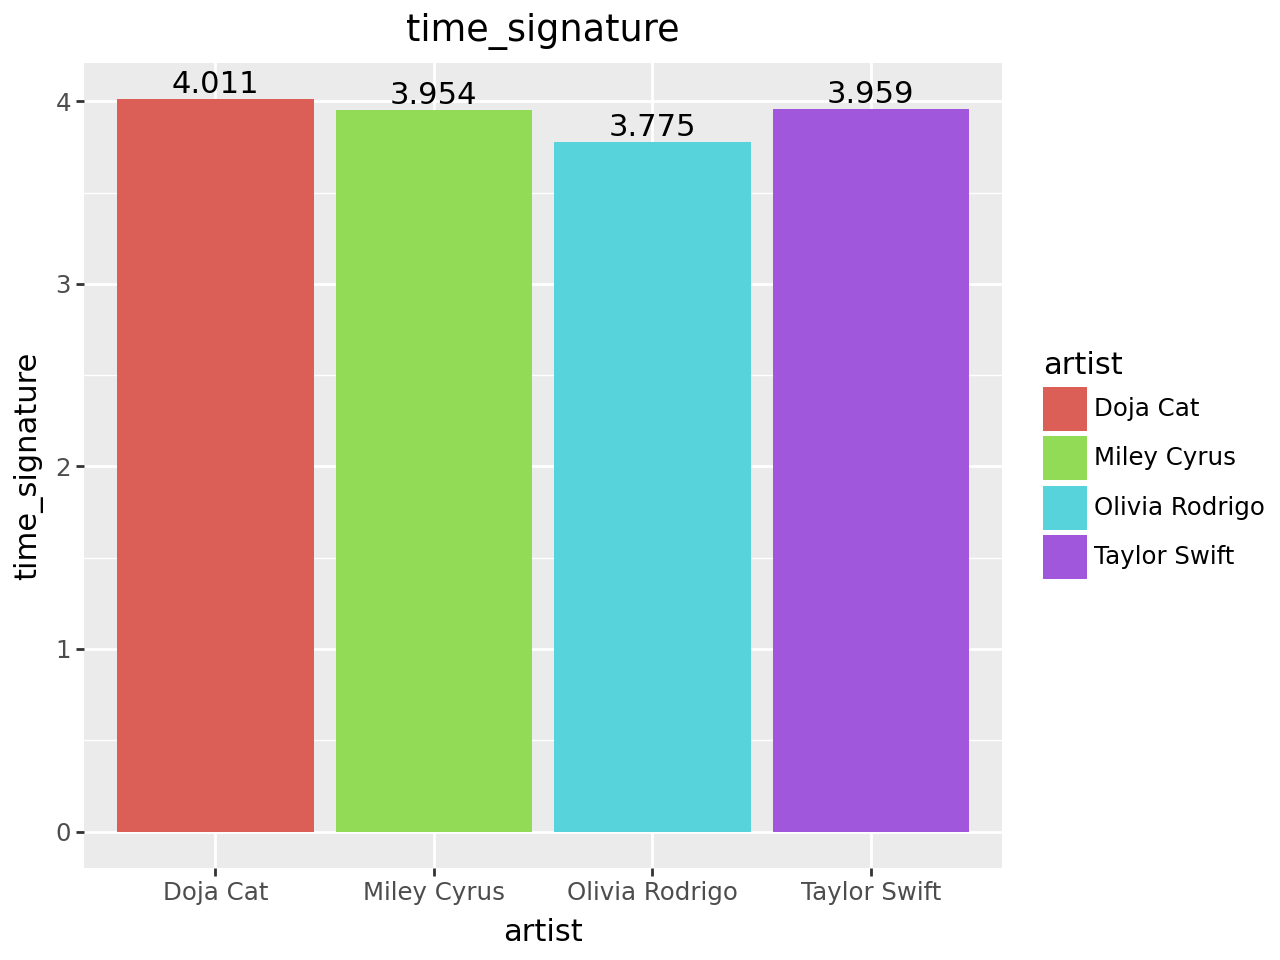

In [46]:
spot_features('time_signature')

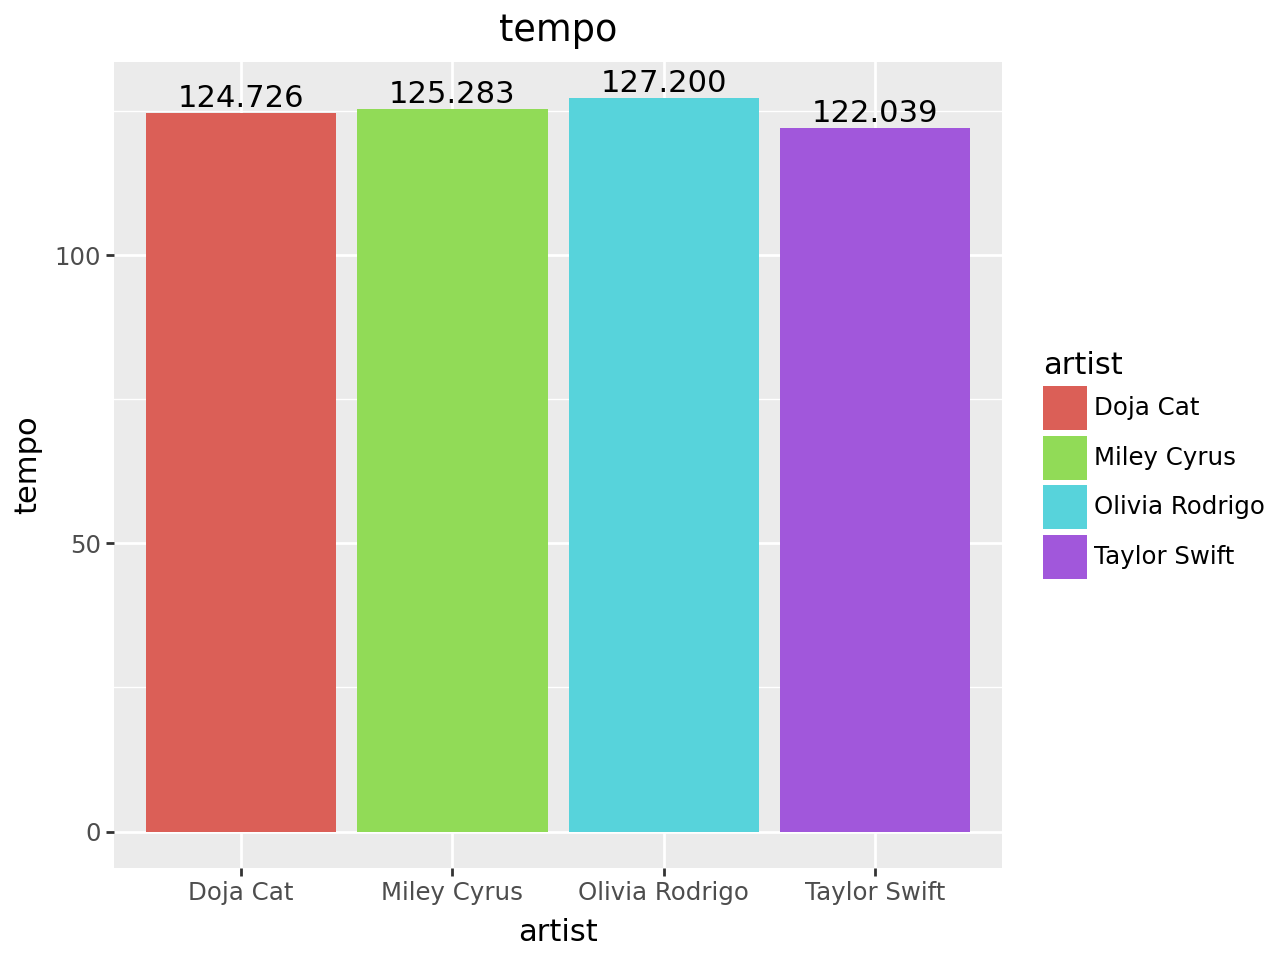

In [45]:
spot_features('tempo')

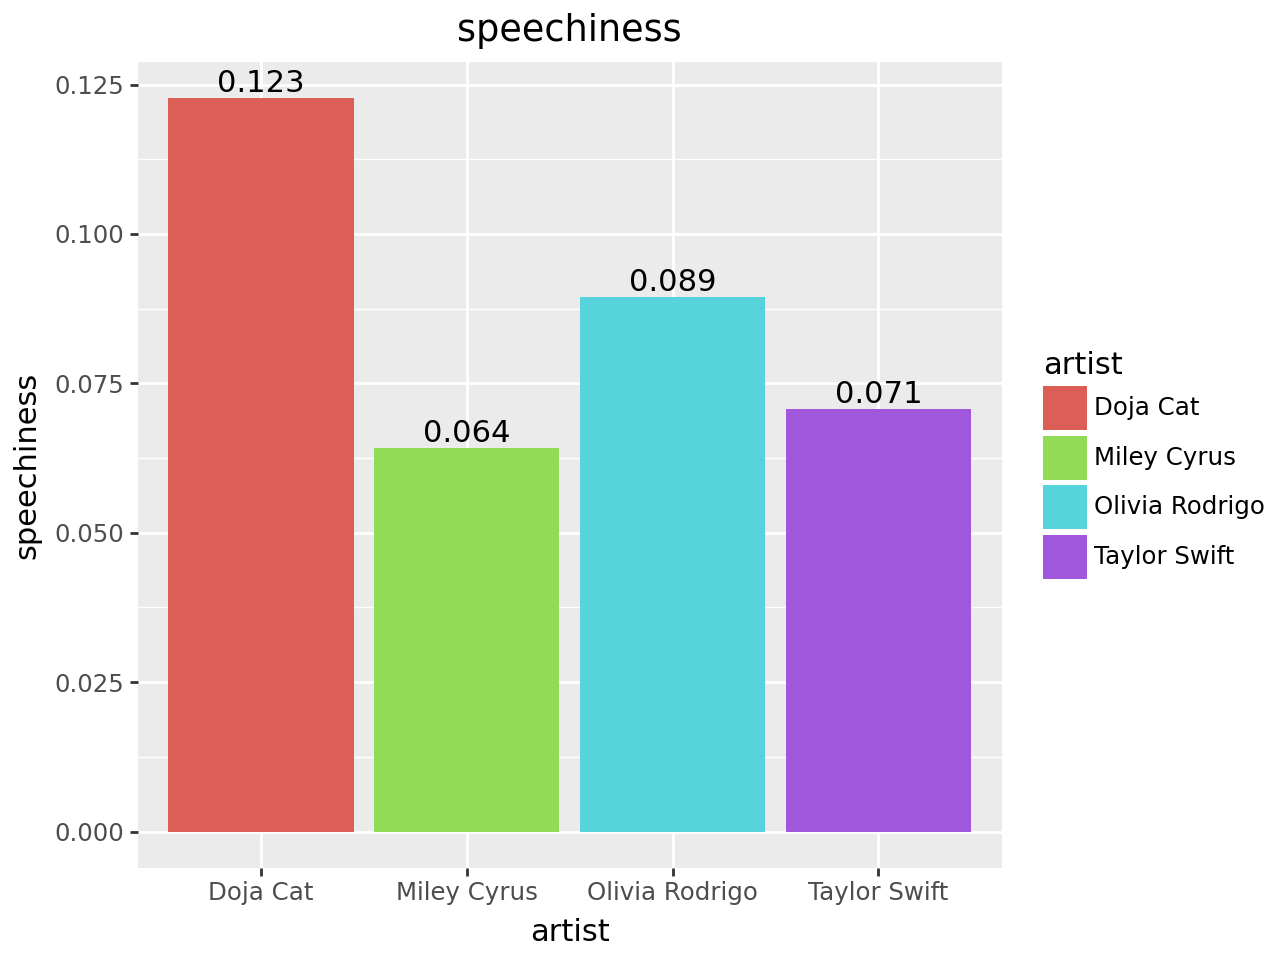

In [44]:
# presence of spoken words (like rap)
spot_features('speechiness')

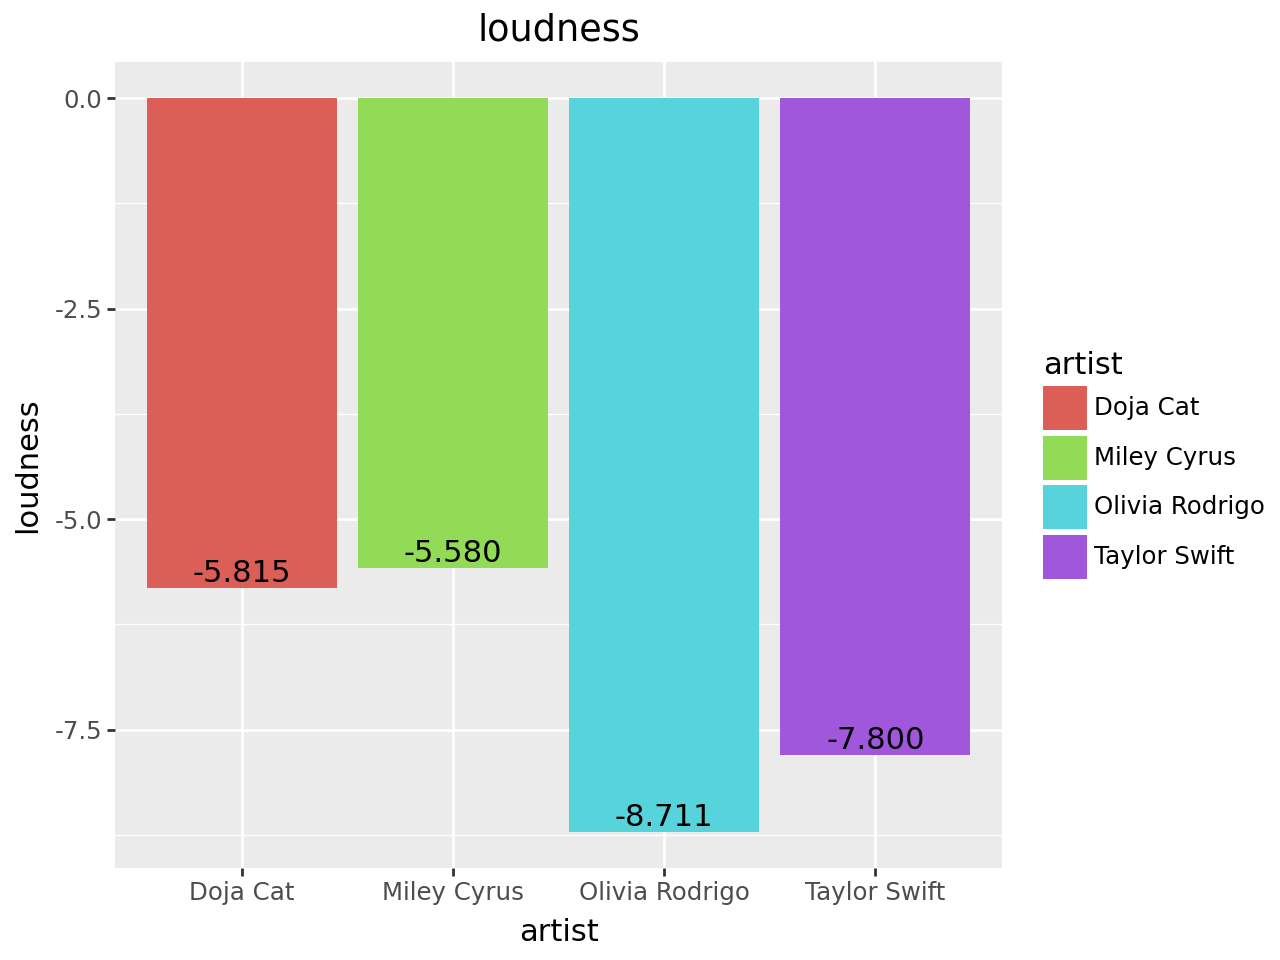

In [43]:
spot_features('loudness')

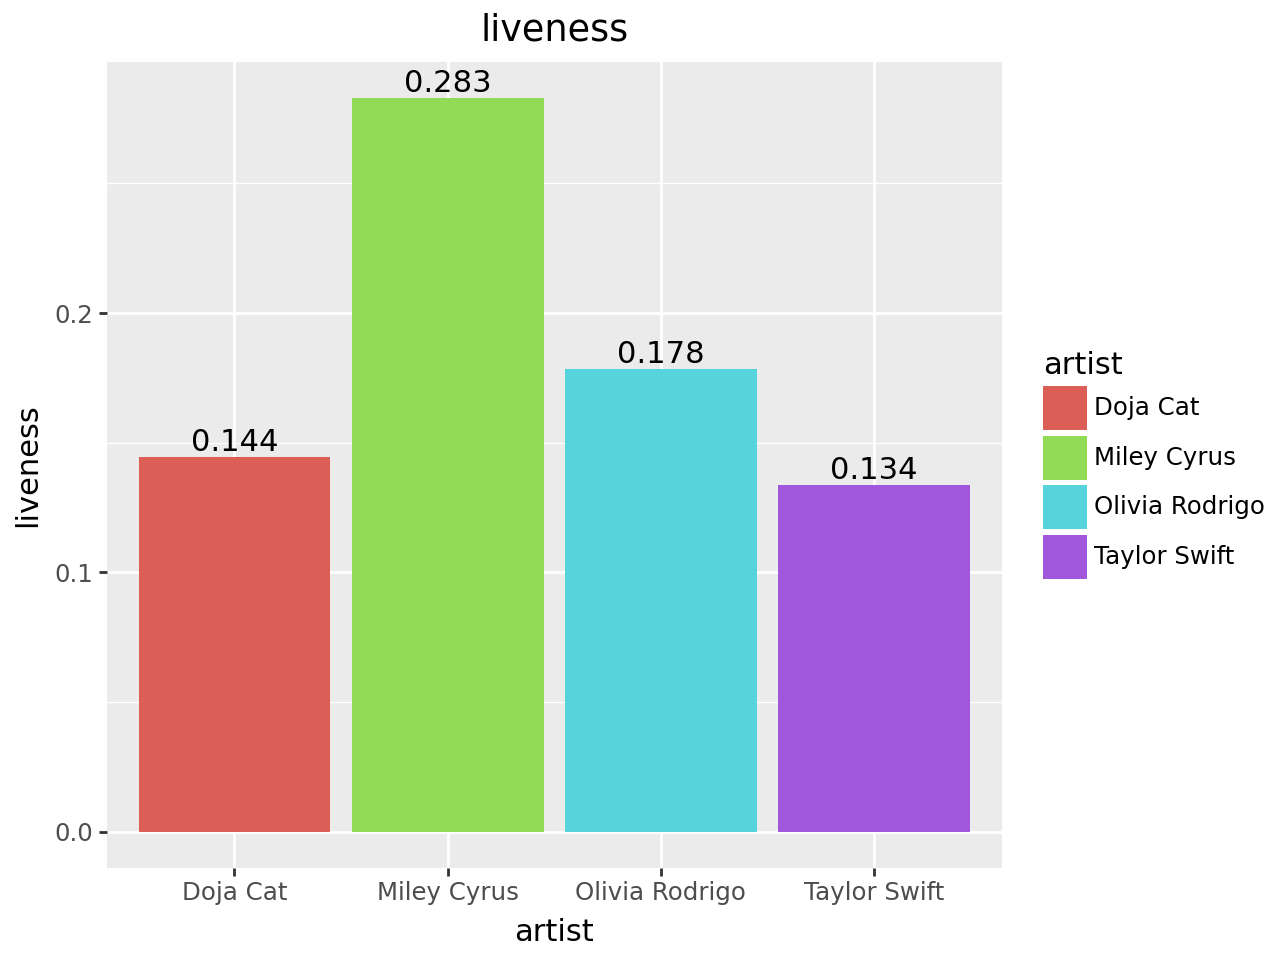

In [42]:
# live music
spot_features('liveness')

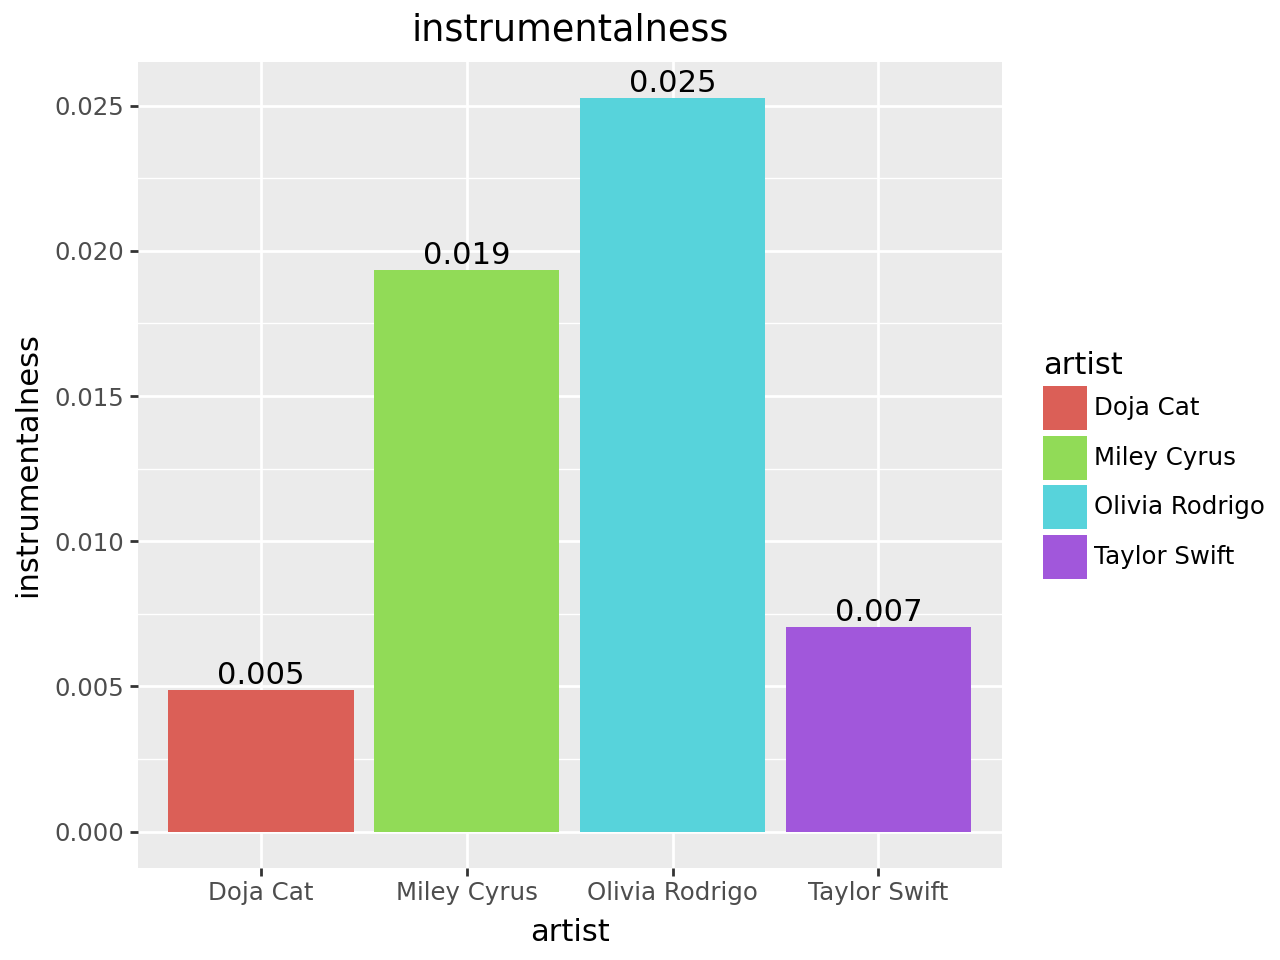

In [41]:
spot_features('instrumentalness')

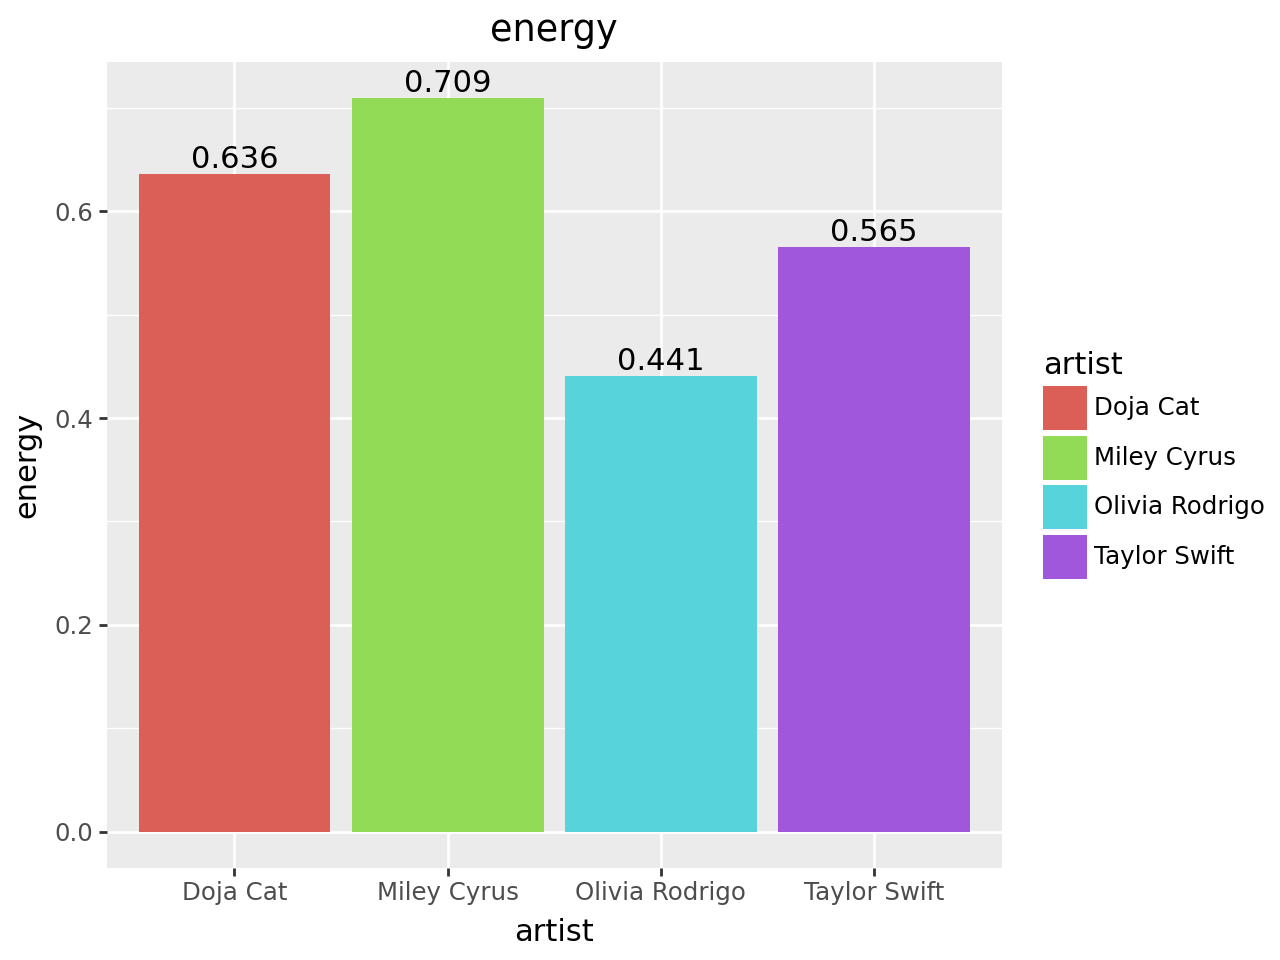

In [40]:
spot_features('energy')

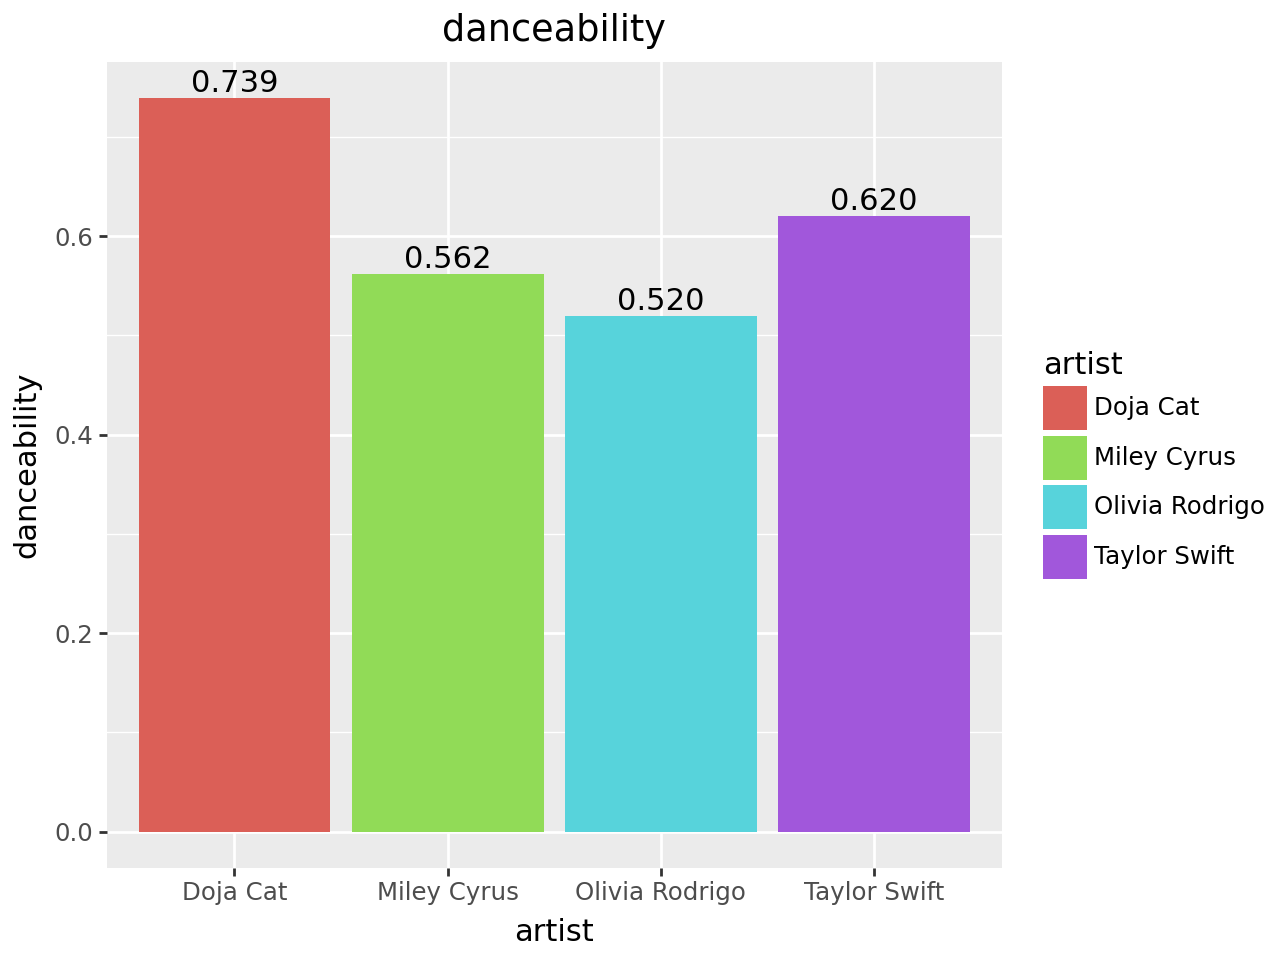

In [39]:
# easier to dance to ????
spot_features('danceability')

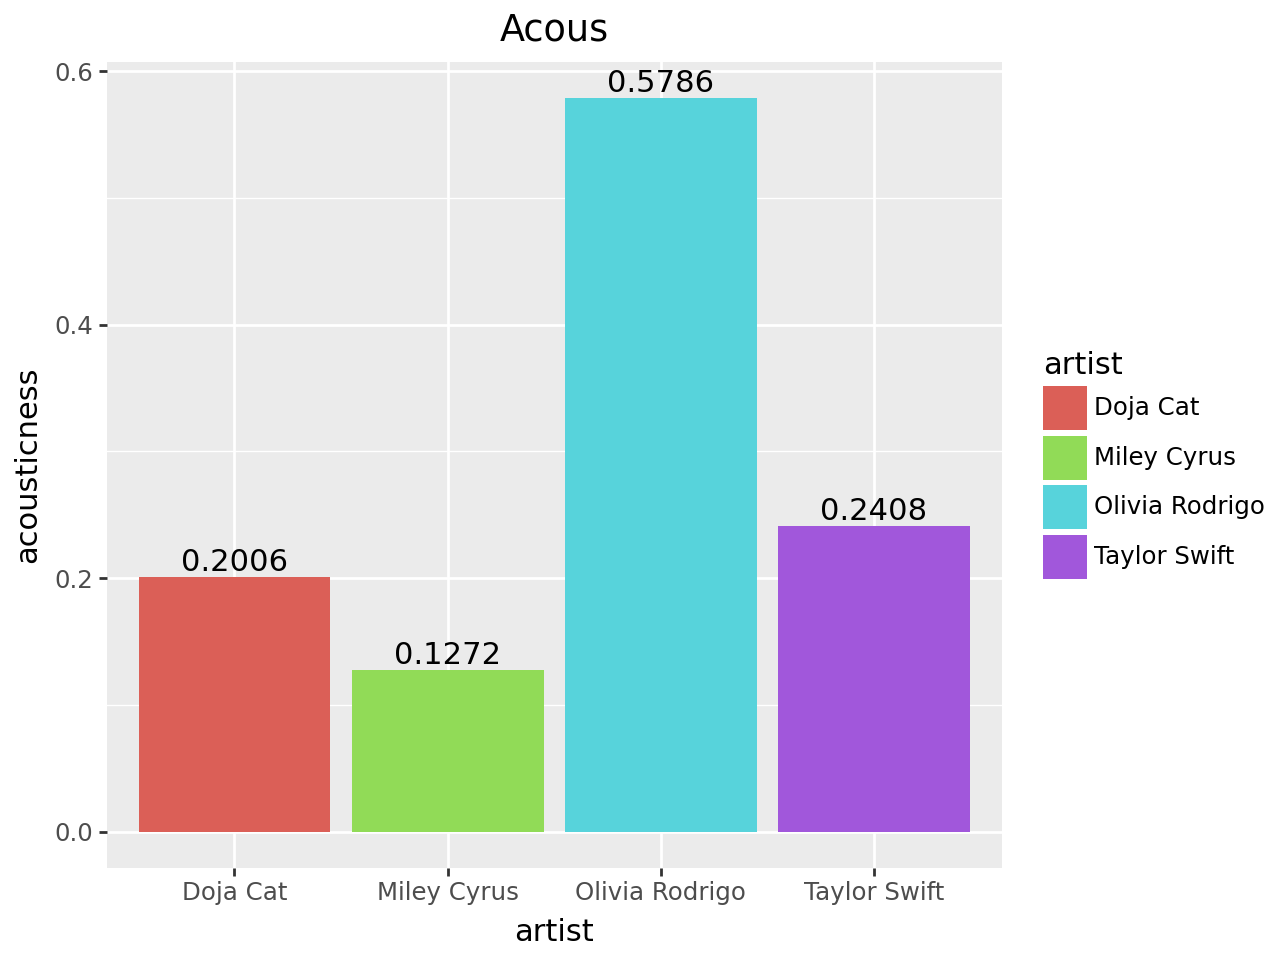

In [36]:
# sound
acous = pop.groupby('artist').agg({'acousticness': 'mean'}).reset_index()

(ggplot(acous, aes(x = 'artist', y= 'acousticness', fill = 'artist'))
+ geom_col()
+ geom_text(aes(label='acousticness'), va='bottom', format_string='{:.4f}')
+ labs(
    x = 'artist',
    y = 'acousticness',
    title = 'Acous'
))

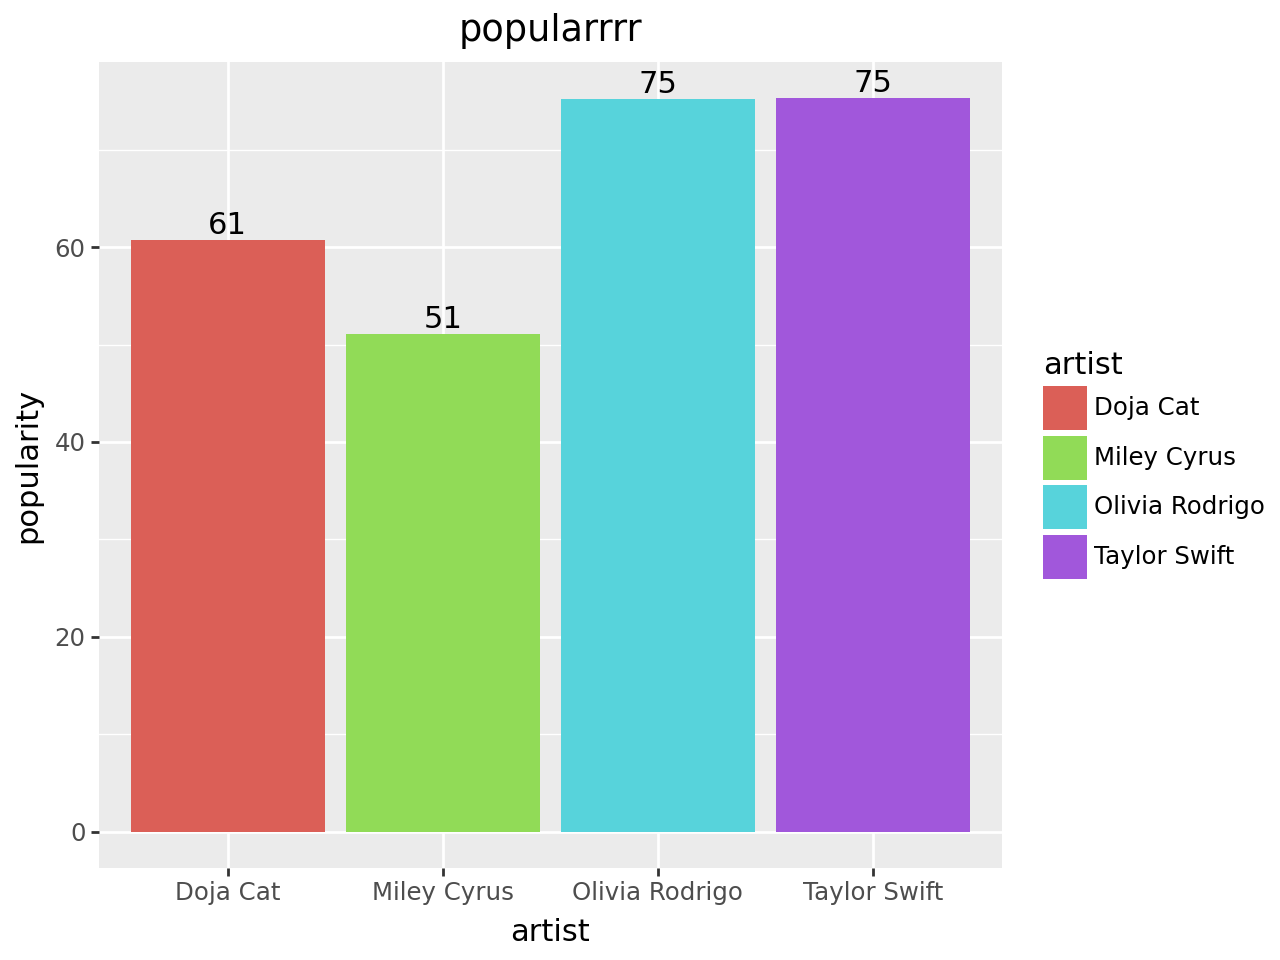

In [29]:
# stream count

popularity = pop.groupby('artist').agg({'popularity': 'mean'}).reset_index()

(ggplot(popularity, aes(x = 'artist', y= 'popularity', fill = 'artist'))
+ geom_col()
+ geom_text(aes(label='popularity'), va='bottom', format_string='{:.0f}')
+ labs(
    x = 'artist',
    y = 'popularity',
    title = 'popularrrr'
))

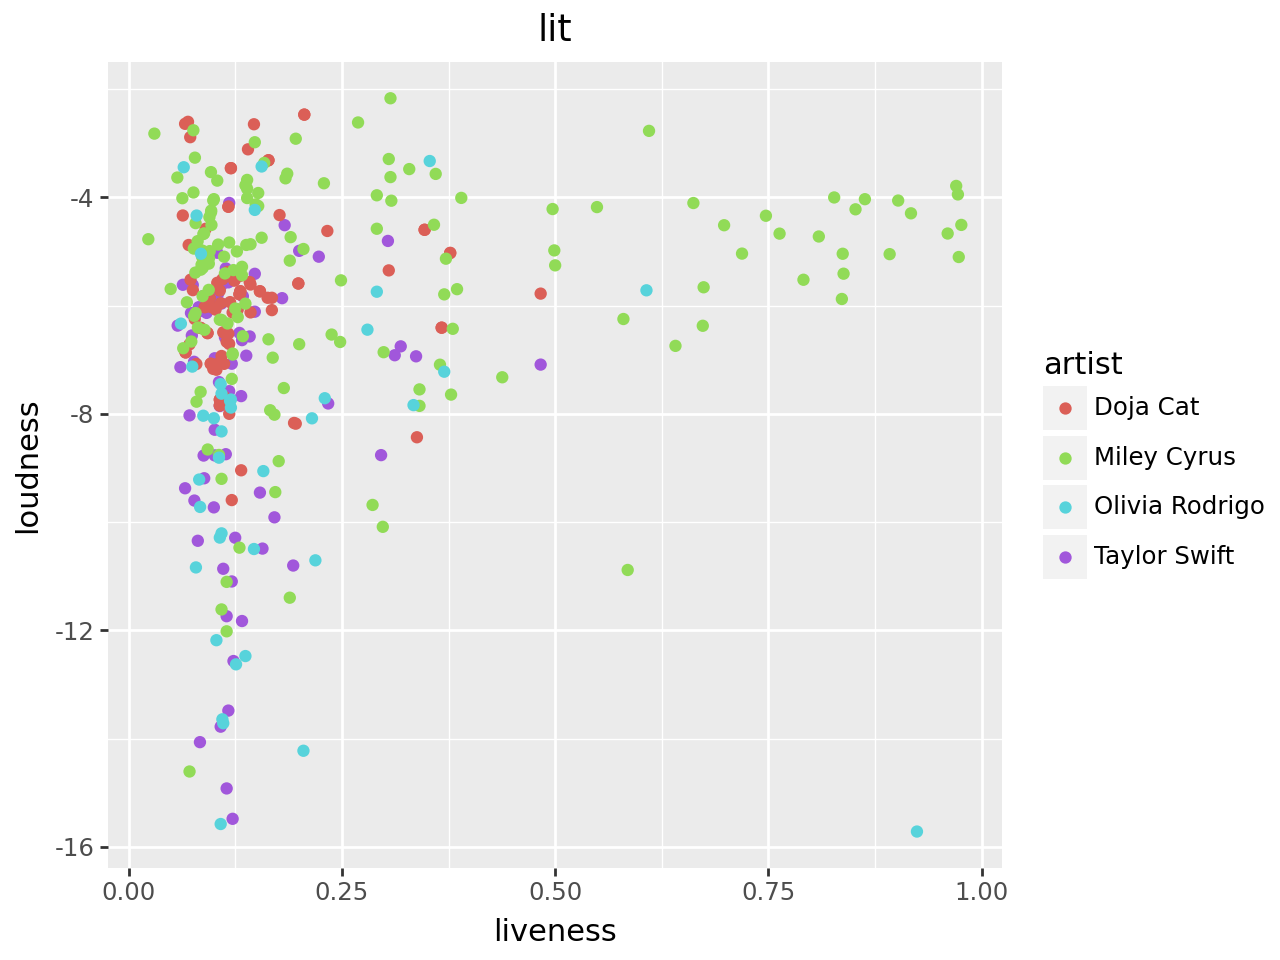

In [19]:
(ggplot(pop, aes(x = 'liveness', y= 'loudness', color = 'artist'))
+ geom_point()
+ labs(
    x = 'liveness',
    y = 'loudness',
    title = 'lit'
))

## final ranking

In [52]:
pop2 = pop.copy()
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the column
pop2['popularity'] = scaler.fit_transform(pop2[['popularity']])
pop2['acousticness'] = scaler.fit_transform(pop2[['acousticness']])
pop2['danceability'] = scaler.fit_transform(pop2[['danceability']])
pop2['energy'] = scaler.fit_transform(pop2[['energy']])
pop2['loudness'] = scaler.fit_transform(pop2[['loudness']])
pop2['liveness'] = scaler.fit_transform(pop2[['liveness']])
pop2['instrumentalness'] = scaler.fit_transform(pop2[['instrumentalness']])
pop2['speechiness'] = scaler.fit_transform(pop2[['speechiness']])
pop2['tempo'] = scaler.fit_transform(pop2[['tempo']])
pop2

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist,loudness_norm,score
108,Lavender Haze,Midnights,2022-10-21,202395,1.424186,0.139654,0.824546,-0.987264,-0.143034,-0.239601,-1.612371,-0.040325,-0.938414,4,Taylor Swift,0.385882,-0.016493
109,Maroon,Midnights,2022-10-21,218270,1.111389,-0.593284,0.157958,-1.179646,-0.149228,-0.518110,-0.736431,-0.332321,-0.562713,4,Taylor Swift,0.547958,-0.187889
110,Anti-Hero,Midnights,2022-10-21,200690,1.987219,-0.327790,0.157958,0.060711,-0.149219,-0.314202,-0.048848,-0.387998,-0.937635,4,Taylor Swift,0.675183,0.225268
111,Snow On The Beach (feat. Lana Del Rey),Midnights,2022-10-21,256124,0.986270,1.717278,0.338492,-1.579599,-0.138486,-0.438536,-2.806363,-0.566165,-0.498956,4,Taylor Swift,0.164956,-0.222199
112,"You're On Your Own, Kid",Midnights,2022-10-21,194206,1.486745,0.661877,0.567632,-1.189772,-0.149183,-0.398749,-1.532559,-0.218492,-0.157335,4,Taylor Swift,0.400650,0.061879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,enough for you,SOUR,2021-05-21,202826,1.173948,1.947349,0.164901,-1.883360,-0.149239,0.068748,-1.698967,0.080927,-1.226373,4,Olivia Rodrigo,0.369859,-0.038680
810,happier,SOUR,2021-05-21,175933,1.611863,1.991171,-1.522400,-0.951826,-0.149134,-0.603155,-1.305493,0.615428,1.498697,3,Olivia Rodrigo,0.442664,0.310780
811,"jealousy, jealousy",SOUR,2021-05-21,173160,1.549304,-0.079460,0.560688,-0.283551,-0.149239,-0.715056,0.045729,0.405092,1.329479,4,Olivia Rodrigo,0.692683,0.468032
812,favorite crime,SOUR,2021-05-21,152666,1.611863,2.360014,-1.702935,-1.817545,-0.149239,-0.289335,-1.615563,-0.579775,1.634377,4,Olivia Rodrigo,0.385291,0.118192


In [53]:
# Calculate the score
# Adjust the weights as necessary
pop2['score'] = (2 * pop2['popularity'] + 
pop2['acousticness'] +
pop2['danceability'] +
pop2['energy'] +
pop2['loudness'] +
pop2['liveness'] +
pop2['instrumentalness'] +
pop2['speechiness'] +
pop2['tempo'])/ 9   # Divided by the total weight (9 in this case)

# Group by artist and calculate the mean score for each artist
artist_scores = pop2.groupby('artist')['score'].mean().reset_index()

# Rank the artists by their score
artist_scores = artist_scores.sort_values(by='score', ascending=False).reset_index(drop=True)

# Display the ranked artists
print(artist_scores)


           artist     score
0        Doja Cat  0.121742
1  Olivia Rodrigo  0.077040
2    Taylor Swift  0.036838
3     Miley Cyrus -0.110367


## Popular Song and Lyrics analysis

In [147]:
songs = pop.sort_values(by='popularity', ascending = False)
tops = songs[songs['popularity']>90]
final4 = tops.iloc[[0, 1, 2, -1]]
final4

,name,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,artist
277,Cruel Summer,Lover,2019-08-23,178426,100,0.1170,0.552,0.702,0.000021,0.1050,-5.707,0.1570,169.994,4,Taylor Swift
793,vampire,GUTS,2023-09-08,219724,95,0.1770,0.511,0.532,0.000000,0.2910,-5.745,0.0578,138.005,4,Olivia Rodrigo
621,Flowers,Endless Summer Vacation,2023-08-18,200600,95,0.0584,0.706,0.691,0.000070,0.0232,-4.775,0.0633,118.048,4,Miley Cyrus
539,Agora Hills,Scarlet,2023-09-22,265360,91,0.2280,0.750,0.674,0.000089,0.1220,-6.128,0.0970,123.026,4,Doja Cat


In [148]:
def plot_features(df):
    # List of columns to exclude
    exclude_cols = ['name','album', 'release_date', 'album', 'time_signature', 'score', 'loudness_norm', 'artist']
    
    # Iterate over columns
    for column in df.columns:
        if column not in exclude_cols:
            # Create plot for the current feature
            plot = (ggplot(df, aes(x='artist', y=column, fill='artist'))
                    + geom_col()
                    + geom_text(aes(label=column), va='bottom', format_string='{:.3f}')
                    + labs(x='artist', y=column, title=column))
            
            # Print the plot
            plot.show()

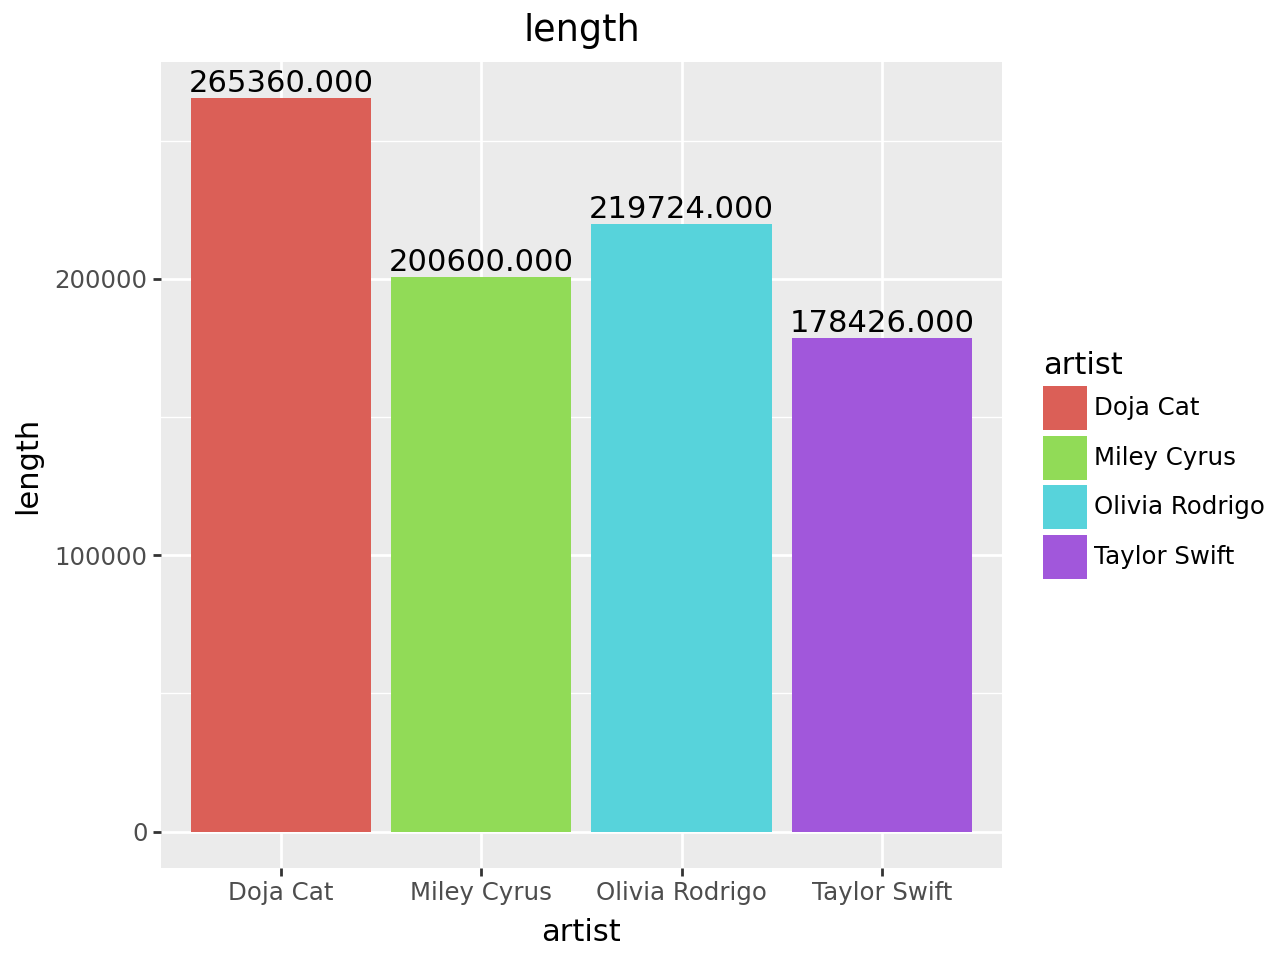

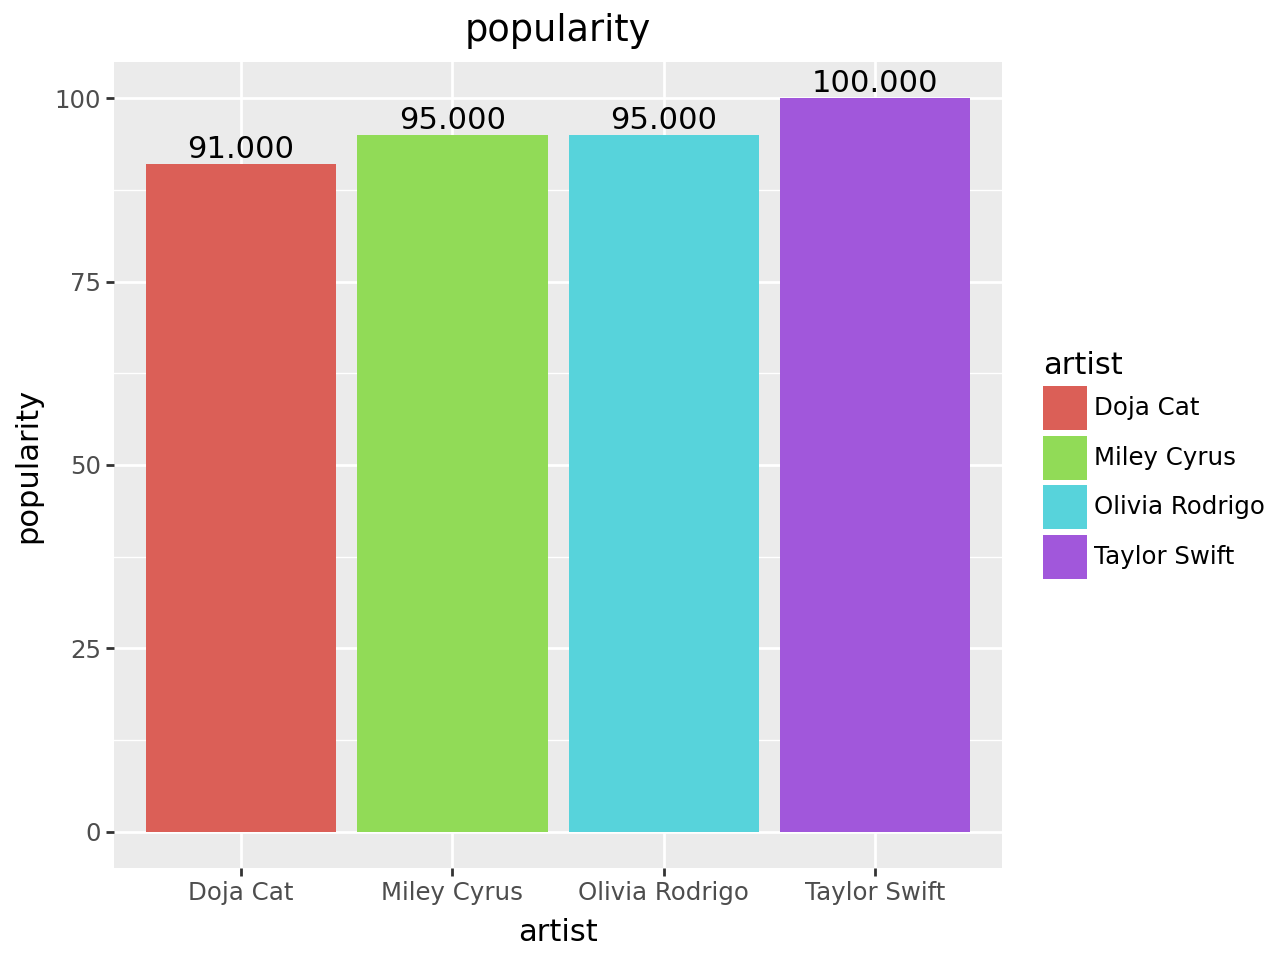

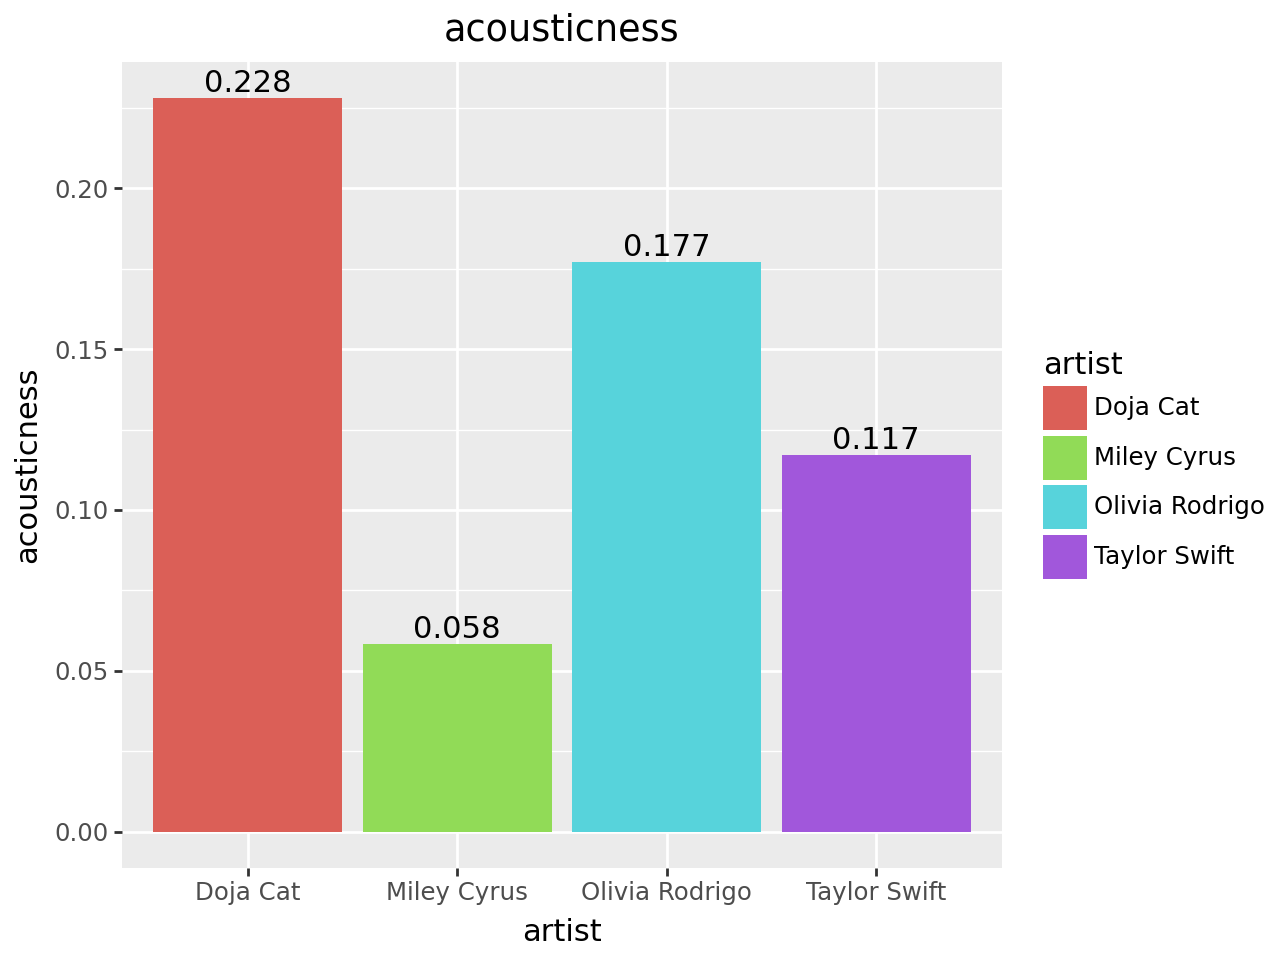

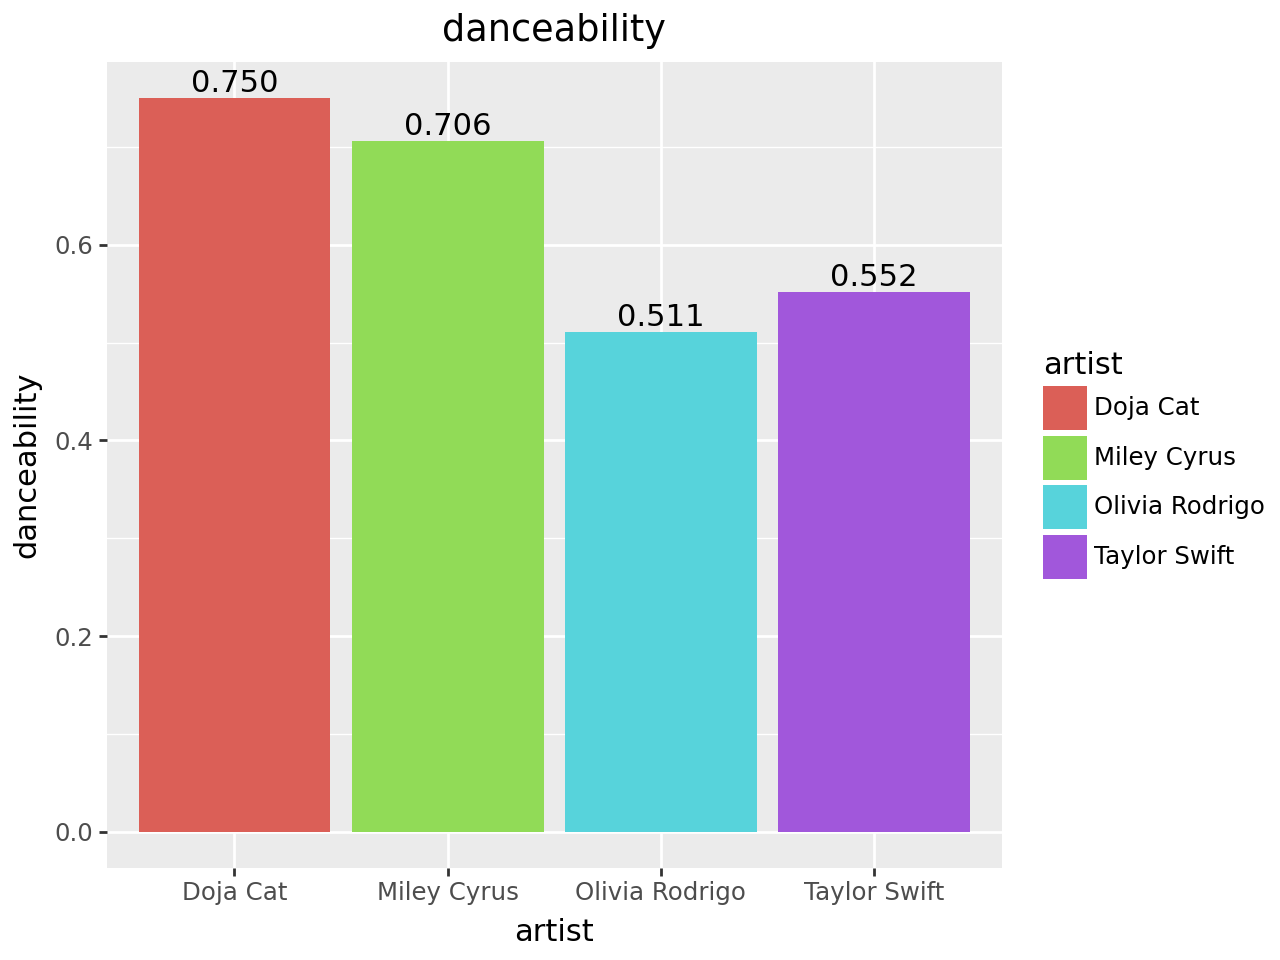

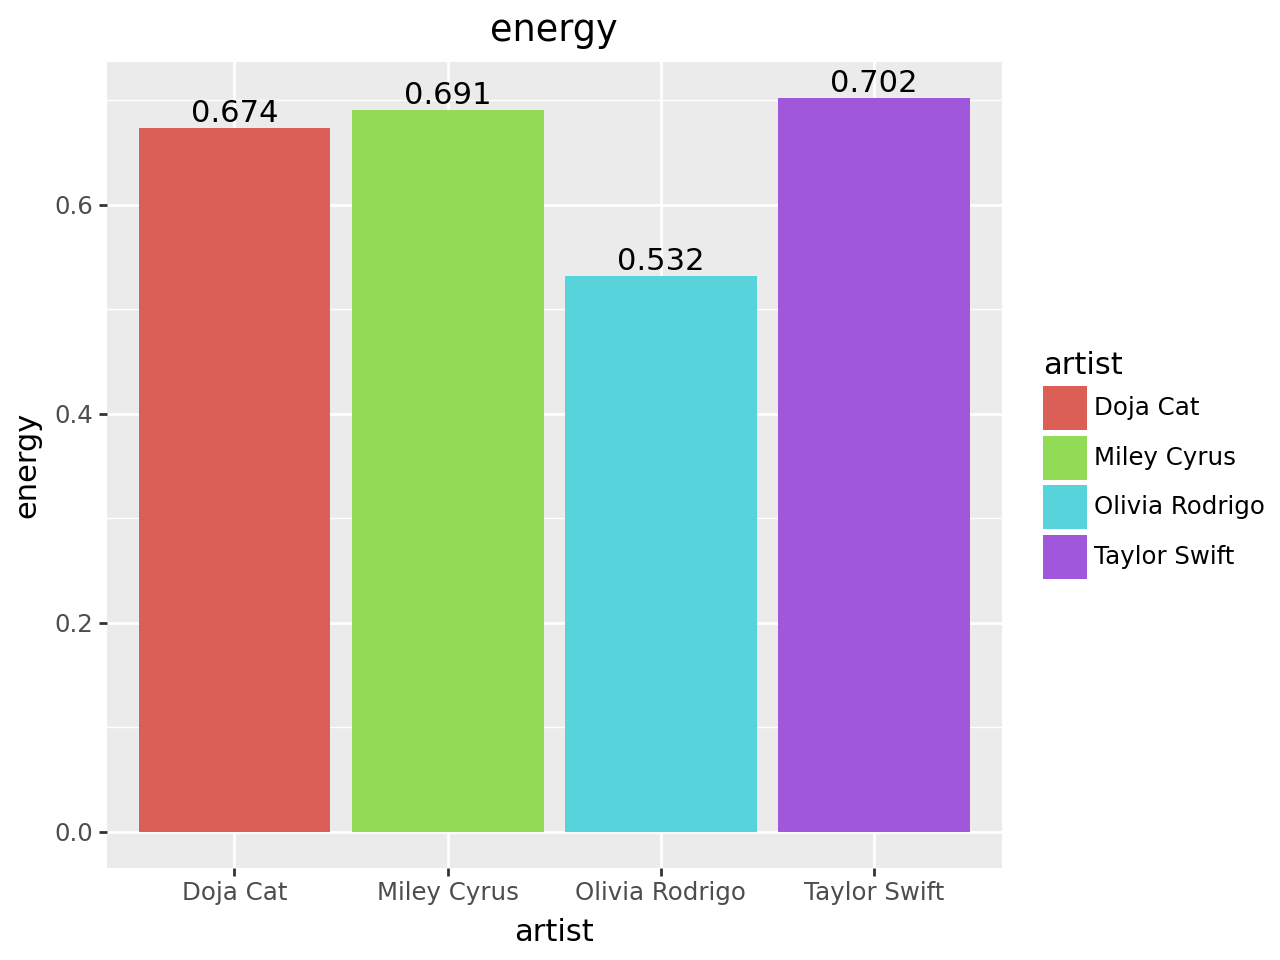

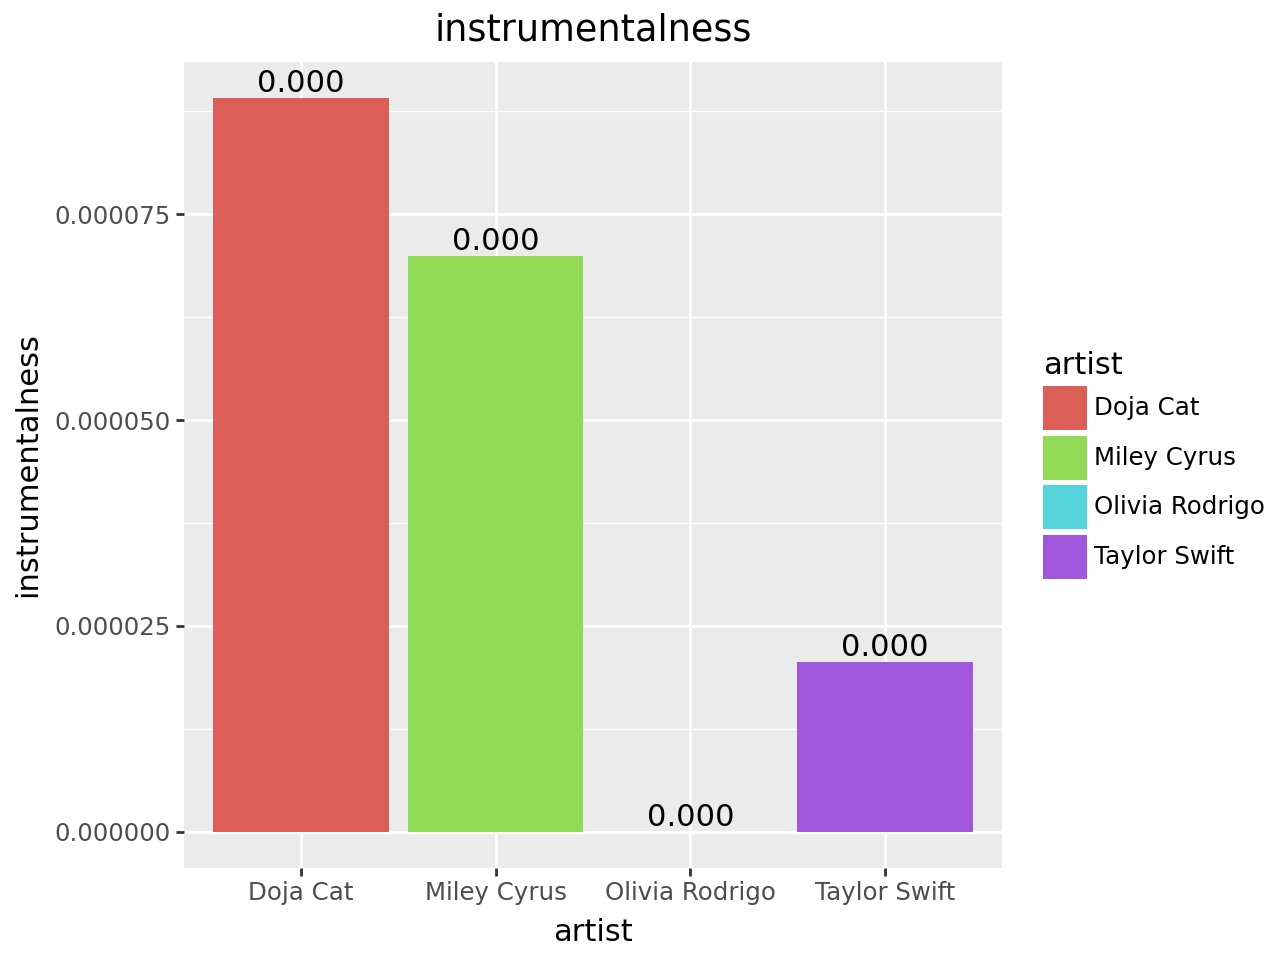

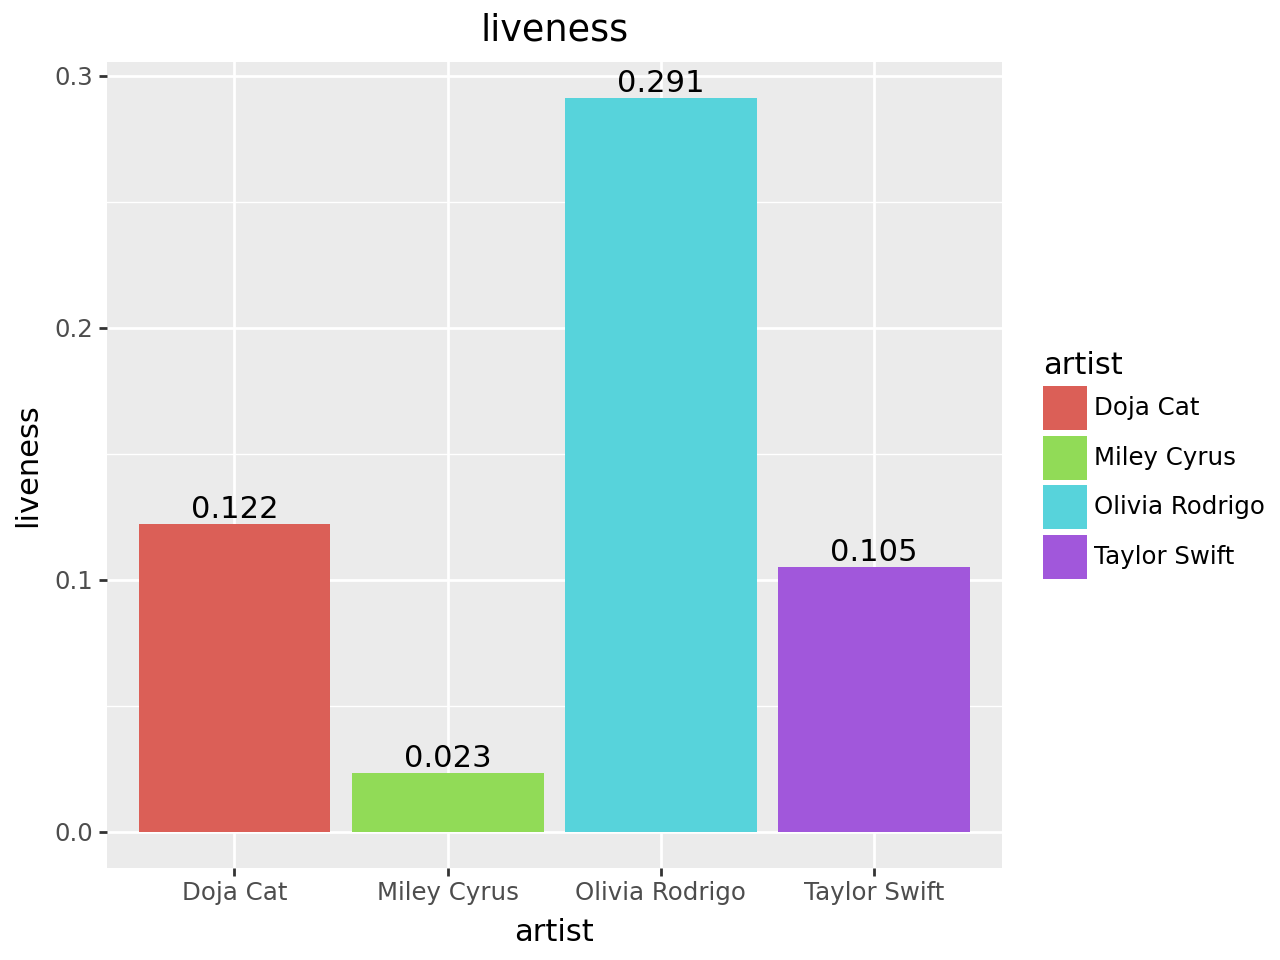

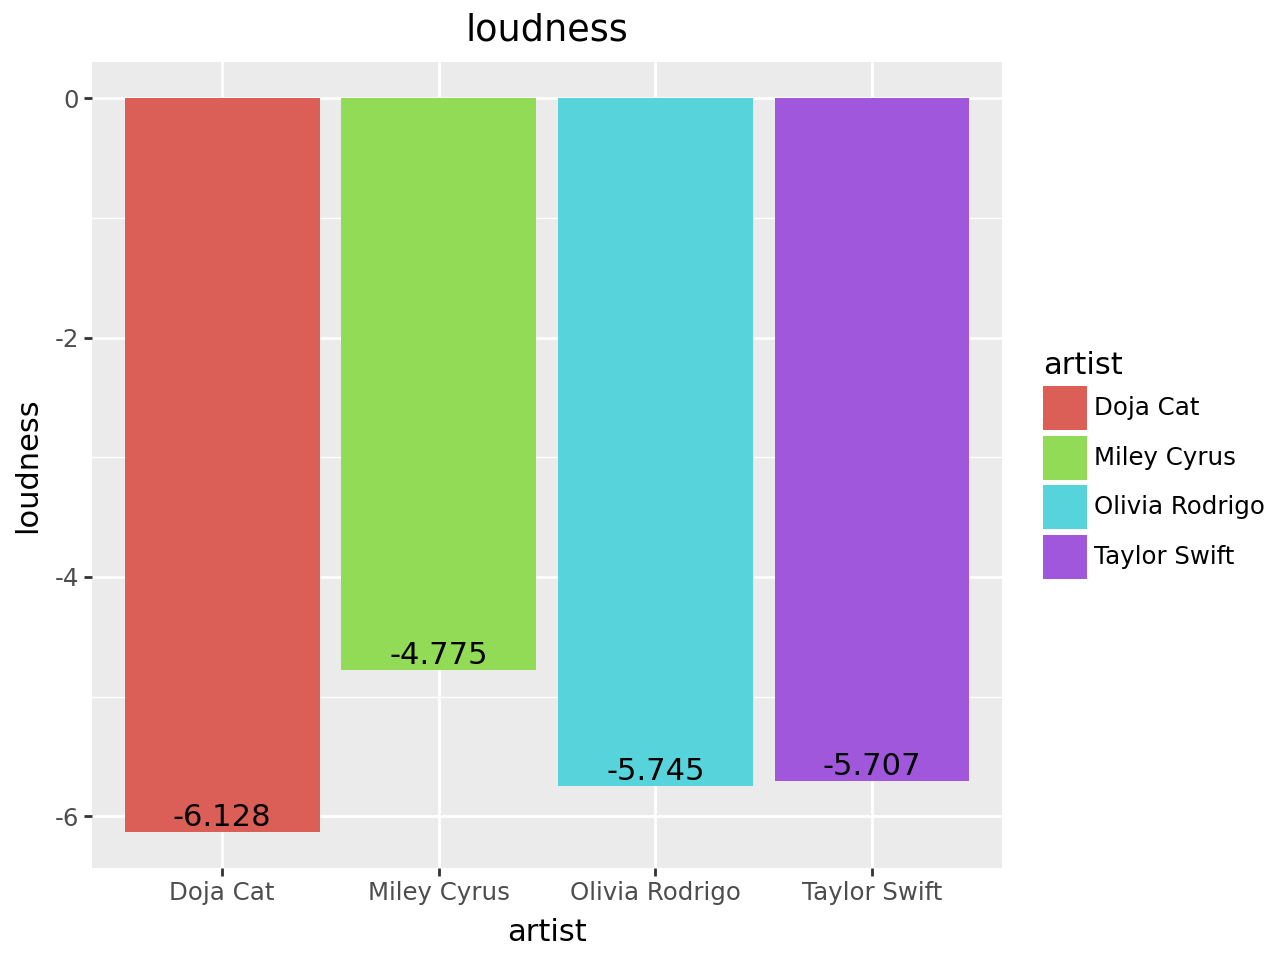

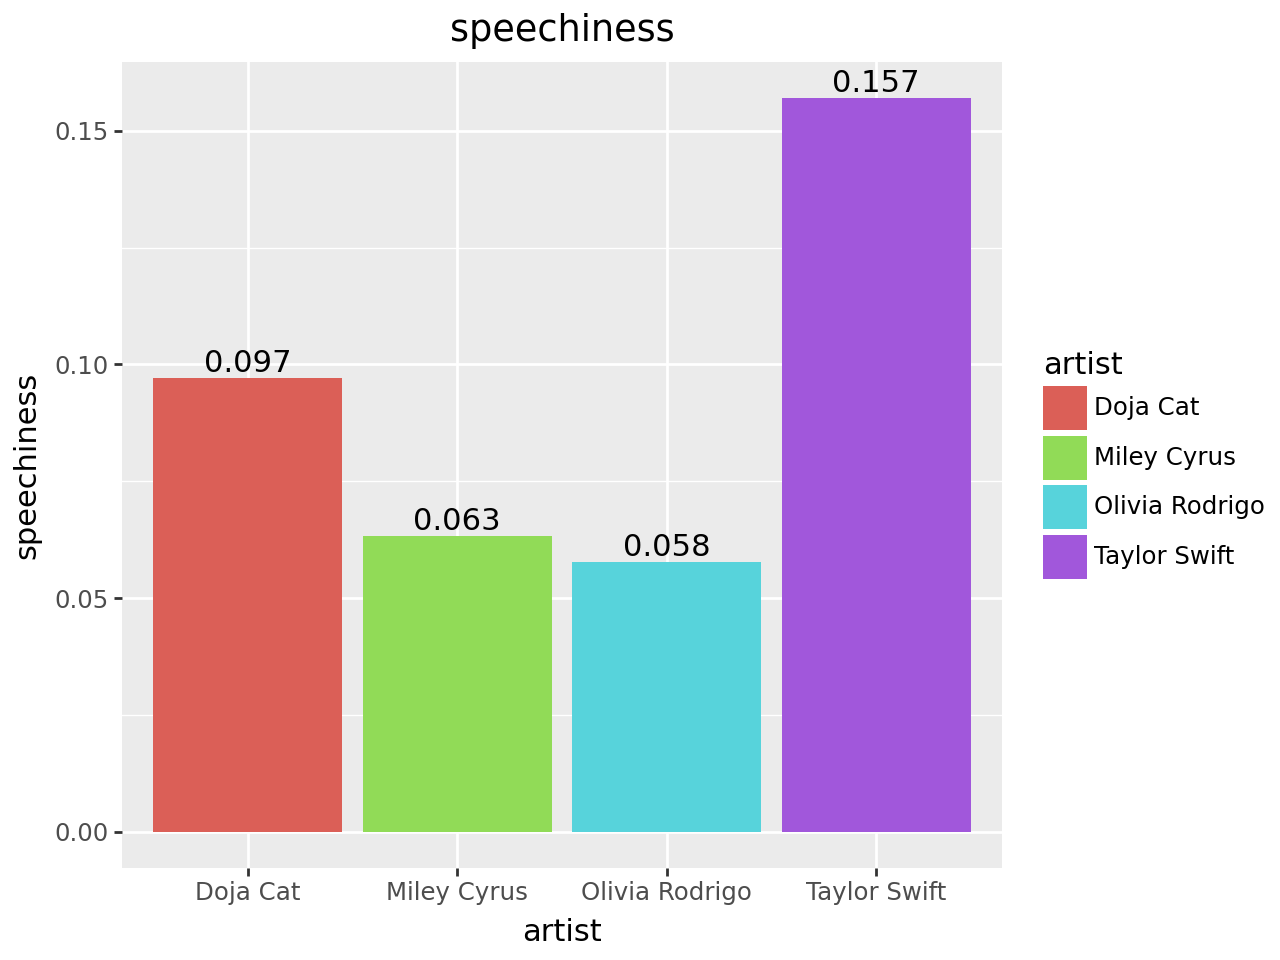

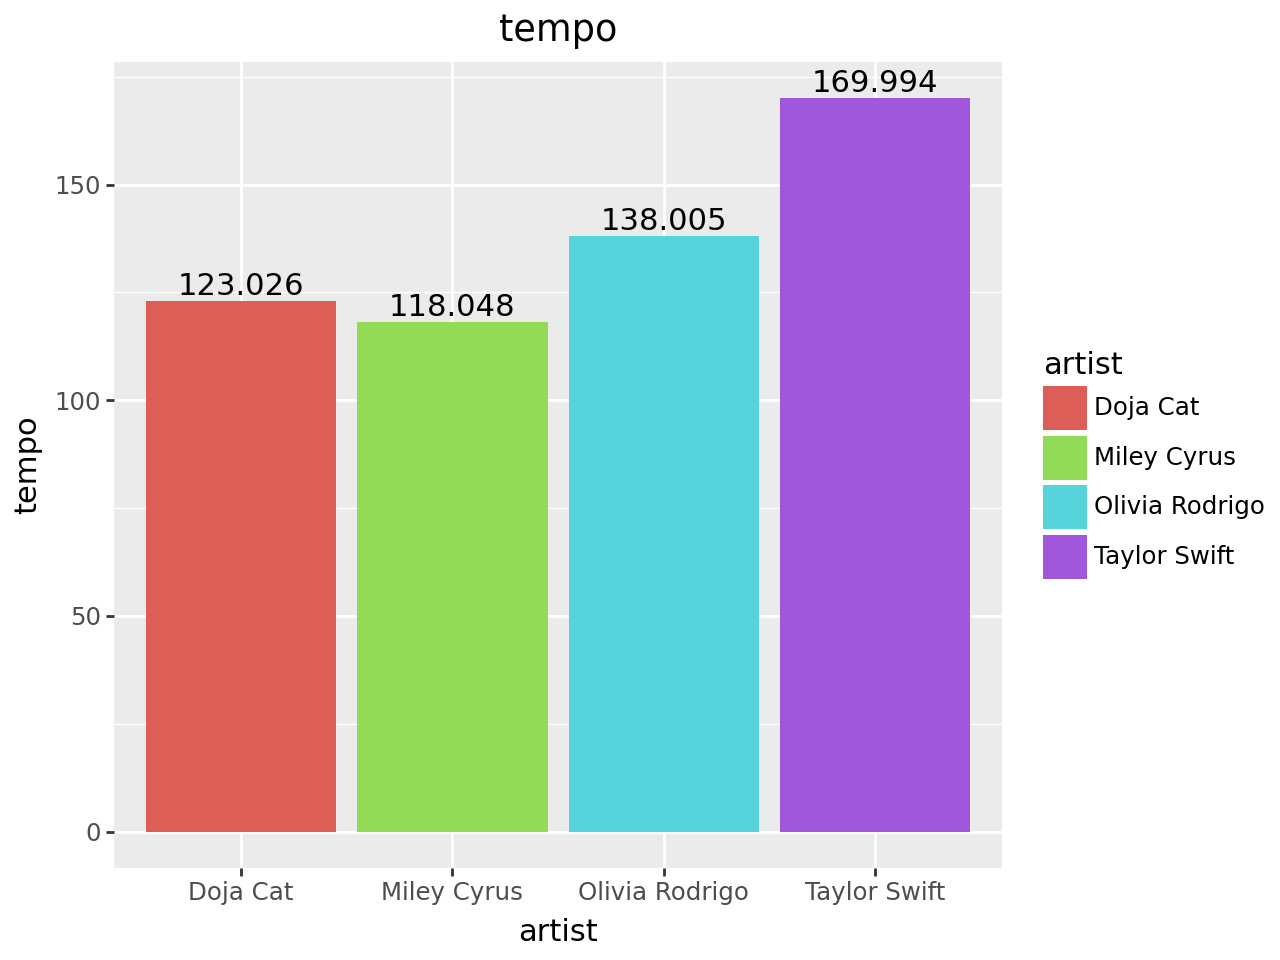

In [149]:
plot_features(final4)

In [150]:
def count_word_frequency(lyrics):
    # Tokenize the lyrics into individual words
    words = lyrics.split()

    # Convert all words to lowercase
    words = [word.lower() for word in words]

    # Remove punctuation marks
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]

    # Define filler words to be excluded
    filler_words = {'the', 'a', 'and', 'of', 'in', 'to', 'for', 'on', 'at', 'with', 'is', 'are', 'were', 'was'}

    # Filter out filler words
    words = [word for word in words if word.strip() and word not in filler_words]

    # Count the frequency of each remaining word
    word_freq = Counter(words)

    return word_freq

In [151]:
Dlyrics = """ Yeah, yeah
Kissing, I hope they caught us
Whether they like or not (not)
I wanna show you off (off), I wanna show you off (off)
I wanna brag about it (yeah)
I wanna tie the knot (knot)
I wanna show you off (off), I wanna show you off (off)
I wanna show you (off), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you (yeah), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you
Hold my hand
You can hit while they watch, boy
Somethin' different about you
Love it when he hit and smack too
Baby, lemme lick on your tattoos
That's true that I like PDA
Take it to a seedy place
Suck a little dick in the bathroom
Who that man with the big strong hands
On her ass in the club with the paps? Baby, that's you
Front seat chillin' with the window down
I be ten toes down on the dash getting' fast food
Hope you can handle the heat
Put your name in the streets
Get used to my fans looking at you
Fuck what they heard, I don't fuck with them birds
I'm a mean kitty, don't get stabbed with the rat tooth
Boys be mad that I don't fuck incels
Girls hate too, gun to their pigtail
I love you, I wanna big chill
Boy, don't trip, I'll split a big bill
Take you 'round the world, they don't have to understand
Rub it in their face, put a rock on her hand
Kissing, I hope they caught us
Whether they like or not (not)
I wanna show you off (off), I wanna show you off (off)
I wanna brag about it (yeah)
I wanna tie the knot (knot)
I wanna show you off (off), I wanna show you off (off)
I wanna show you (off), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you (yeah), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you
Hold my hand
You can hit while they watch, boy
'Cause love is pain but I need this shit (yeah)
We fuck too good when the bean kicks in
Like Fortnite, I'ma need your skin (yeah)
Don't give a fuck where the penis been (uh)
Boy, you're the one, you're the only man
Me and you on my OnlyFans (come on)
Holy cow, you're the Holy Trin' (Trin')
Hold me down when a hole need dick
Be my security, it's your therapy
With you I ain't holding shit back
When I need my space, you give that
When he broke my heart, you fixed that
With a long walk on the beach
Love it when they honk-honk on the street
When they see us zoom by in the Jeep
We a whole damn joint, we an energy
Baby, we could just ride on our enemies
They all wanna know how you get to me
Let 'em feel how they feel and be Philistines
'Cause this type of love's the epitome, said
Kissing, I hope they caught us
Whether they like or not (not)
I wanna show you off (off), I wanna show you off (off)
I wanna brag about it (yeah)
I wanna tie the knot (knot)
I wanna show you off (off), I wanna show you off (off)
I wanna show you (off), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you (yeah), yeah, yeah
I wanna show you off (off), I wanna show you off (off)
I wanna show you
Hold my hand
You can hit while they watch, boy"""


Dword_frequency = count_word_frequency(Dlyrics)
#print(Dword_frequency)


Dword_freq_dict ={'i': 51, 'off': 51, 'you': 47, 'wanna': 41, 'show': 33, 'yeah': 22, 'they': 15,
                  'my': 8, 'it': 7, 'when': 7, 'not': 6, 'knot': 6, 'dont': 6, 'like': 5, 'boy': 5,
                  'that': 5, 'fuck': 5, 'hope': 4, 'us': 4, 'about': 4, 'hold': 4, 'hand': 4, 'can': 4,
                  'hit': 4, 'love': 4, 'your': 4, 'be': 4, 'need': 4, 'we': 4, 'kissing': 3,
                  'caught': 3, 'whether': 3, 'or': 3, 'brag': 3, 'tie': 3, 'while': 3, 'watch': 3, 
                  'too': 3, 'baby': 3, 'big': 3, 'down': 3, 'get': 3, 'youre': 3, 'me': 3, 'he': 2,
                  'thats': 2, 'take': 2, 'dick': 2, 'man': 2, 'her': 2, 'put': 2, 'their': 2,
                  'cause': 2, 'this': 2, 'shit': 2, 'give': 2, 'holy': 2, 'trin': 2, 'how': 2, 
                  'feel': 2, 'somethin': 1, 'different': 1, 'smack': 1, 'lemme': 1, 'lick': 1,
                  'tattoos': 1, 'true': 1, 'pda': 1, 'seedy': 1, 'place': 1, 'suck': 1, 'little': 1,
                  'bathroom': 1, 'who': 1, 'strong': 1, 'hands': 1, 'ass': 1, 'club': 1, 'paps': 1,
                  'front': 1, 'seat': 1, 'chillin': 1, 'window': 1, 'ten': 1, 'toes': 1, 'dash': 1,
                  'getting': 1, 'fast': 1, 'food': 1, 'handle': 1, 'heat': 1, 'name': 1, 'streets': 1,
                  'used': 1, 'fans': 1, 'looking': 1, 'what': 1, 'heard': 1, 'them': 1, 'birds': 1,
                  'im': 1, 'mean': 1, 'kitty': 1, 'stabbed': 1, 'rat': 1, 'tooth': 1, 'boys': 1, 
                  'mad': 1, 'incels': 1, 'girls': 1, 'hate': 1, 'gun': 1, 'pigtail': 1, 'chill': 1,
                  'trip': 1, 'ill': 1, 'split': 1, 'bill': 1, 'round': 1, 'world': 1, 'have': 1,
                  'understand': 1, 'rub': 1, 'face': 1, 'rock': 1, 'pain': 1, 'but': 1, 'good': 1,
                  'bean': 1, 'kicks': 1, 'fortnite': 1, 'ima': 1, 'skin': 1, 'where': 1, 'penis': 1,
                  'been': 1, 'uh': 1, 'one': 1, 'only': 1, 'onlyfans': 1, 'come': 1, 'cow': 1,
                  'hole': 1, 'security': 1, 'its': 1, 'therapy': 1, 'aint': 1, 'holding': 1, 'back': 1,
                  'space': 1, 'broke': 1, 'heart': 1, 'fixed': 1, 'long': 1, 'walk': 1, 'beach': 1,
                  'honkhonk': 1, 'street': 1, 'see': 1, 'zoom': 1, 'by': 1, 'jeep': 1, 'whole': 1,
                  'damn': 1, 'joint': 1, 'an': 1, 'energy': 1, 'could': 1, 'just': 1, 'ride': 1,
                  'our': 1, 'enemies': 1, 'all': 1, 'know': 1, 'let': 1, 'em': 1, 'philistines': 1,
                  'type': 1, 'loves': 1, 'epitome': 1, 'said': 1}



# Convert the word frequency dictionary to a DataFrame
Dword_freq_df = pd.DataFrame(list(Dword_freq_dict.items()), columns=['Word', 'Frequency'])
Dword_freq_df


Dword_freq_df[Dword_freq_df['Frequency'] > 5]


,Word,Frequency
0,i,51
1,off,51
2,you,47
3,wanna,41
4,show,33
5,yeah,22
6,they,15
7,my,8
8,it,7
9,when,7


In [152]:
Mlyrics = """We were good, we were gold
Kinda dream that can't be sold
We were right 'til we weren't
Built a home and watched it burn
Mm, I didn't wanna leave you
I didn't wanna lie
Started to cry, but then remembered I
I can buy myself flowers
Write my name in the sand
Talk to myself for hours
Say things you don't understand
I can take myself dancing
And I can hold my own hand
Yeah, I can love me better than you can
Can love me better
I can love me better, baby
Can love me better
I can love me better, baby
Paint my nails cherry red
Match the roses that you left
No remorse, no regret
I forgive every word you said
Ooh, I didn't wanna leave you, baby
I didn't wanna fight
Started to cry, but then remembered I
I can buy myself flowers
Write my name in the sand
Talk to myself for hours, yeah
Say things you don't understand
I can take myself dancing, yeah
I can hold my own hand
Yeah, I can love me better than you can
Can love me better
I can love me better, baby
Can love me better
I can love me better, baby
Can love me better
I can love me better, baby
Can love me better
Oh, I
I didn't wanna leave you
I didn't wanna fight
Started to cry, but then remembered I
I can buy myself flowers (oh)
Write my name in the sand (mm)
Talk to myself for hours (yeah)
Say things you don't understand (you never will)
I can take myself dancing, yeah
I can hold my own hand
Yeah, I can love me better than
Yeah, I can love me better than you can
Can love me better
I can love me better, baby (oh)
Can love me better
I can love me better (than you can), baby
Can love me better
I can love me better, baby
Can love me better
I """

Mword_frequency = count_word_frequency(Mlyrics)
#print(Mword_frequency)

Mword_freq_dict ={'can': 35, 'i': 33, 'love': 22, 'me': 22, 'better': 22, 'you': 13, 'myself': 9, 
                  'baby': 9, 'yeah': 8, 'my': 7, 'didnt': 6, 'wanna': 6, 'than': 5, 'we': 4, 'leave': 3,
                  'started': 3, 'cry': 3, 'but': 3, 'then': 3, 'remembered': 3, 'buy': 3, 'flowers': 3,
                  'write': 3, 'name': 3, 'sand': 3, 'talk': 3, 'hours': 3, 'say': 3, 'things': 3,
                  'dont': 3, 'understand': 3, 'take': 3, 'dancing': 3, 'hold': 3, 'own': 3, 'hand': 3,
                  'oh': 3, 'that': 2, 'mm': 2, 'no': 2, 'fight': 2, 'good': 1, 'gold': 1, 'kinda': 1,
                  'dream': 1, 'cant': 1, 'be': 1, 'sold': 1, 'right': 1, 'til': 1, 'werent': 1,
                  'built': 1, 'home': 1, 'watched': 1, 'it': 1, 'burn': 1, 'lie': 1, 'paint': 1,
                  'nails': 1, 'cherry': 1, 'red': 1, 'match': 1, 'roses': 1, 'left': 1, 'remorse': 1, 
                  'regret': 1, 'forgive': 1, 'every': 1, 'word': 1, 'said': 1, 'ooh': 1, 'never': 1, 
                  'will': 1}

# Convert the word frequency dictionary to a DataFrame
Mword_freq_df = pd.DataFrame(list(Mword_freq_dict.items()), columns=['Word', 'Frequency'])
Mword_freq_df


Mword_freq_df[Mword_freq_df['Frequency'] > 5]

,Word,Frequency
0,can,35
1,i,33
2,love,22
3,me,22
4,better,22
5,you,13
6,myself,9
7,baby,9
8,yeah,8
9,my,7


In [153]:
# Taylor Swift's Cruel Summer

Tlyrics = """Fever dream high in the quiet of the night
You know that I caught it
Bad, bad boy
Shiny toy with a price
You know that I bought it
Killing me slow, out the window
I'm always waiting for you to be waiting below
Devils roll the dice, angels roll their eyes
What doesn't kill me makes me want you more
And it's new, the shape of your body
It's blue, the feeling I've got
And it's ooh, whoa, oh
It's a cruel summer
It's cool, that's what I tell 'em
No rules in breakable heaven
But ooh, whoa oh
It's a cruel summer
With you
Hang your head low
In the glow of the vending machine
I'm not dying
You say that we'll just screw it up in these trying times
We're not trying
So cut the headlights, summer's a knife
I'm always waiting for you just to cut to the bone
Devils roll the dice, angels roll their eyes
And if I bleed, you'll be the last to know
Oh, it's new, the shape of your body
It's blue, the feeling I've got
And it's ooh, whoa, oh
It's a cruel summer
It's cool, that's what I tell 'em
No rules in breakable heaven
But ooh, whoa, oh
It's a cruel summer
With you
I'm drunk in the back of the car
And I cried like a baby coming home from the bar (oh)
Said, "I'm fine, " but it wasn't true
I don't wanna keep secrets just to keep you
And I snuck in through the garden gate
Every night that summer just to seal my fate (oh)
And I screamed for whatever it's worth
"I love you, " ain't that the worst thing you ever heard?
He looks up grinning like a devil
It's new, the shape of your body
It's blue, the feeling I've got
And it's ooh, whoa, oh
It's a cruel summer
It's cool, that's what I tell 'em
No rules, in breakable heaven
But ooh, whoa, oh
It's a cruel summer
With you
I'm drunk in the back of the car
And I cried like a baby coming home from the bar (oh)
Said, "I'm fine, " but it wasn't true
I don't wanna keep secrets just to keep you
And I snuck in through the garden gate
Every night that summer just to seal my fate (oh)
And I screamed for whatever it's worth
"I love you, " ain't that the worst thing you ever heard?

"""


Tword_frequency = count_word_frequency(Tlyrics)
#print(Tword_frequency)

Tword_freq_dict = {'its': 20, 'i': 16, 'you': 15, 'oh': 11, 'summer': 8, 'that': 7, 'im': 7, 'ooh': 6,
                  'whoa': 6, 'cruel': 6, 'just': 6, 'it': 5, 'but': 5, 'roll': 4, 'what': 4, 'your': 4,
                  'keep': 4, 'night': 3, 'know': 3, 'me': 3, 'waiting': 3, 'new': 3, 'shape': 3,
                  'body': 3, 'blue': 3, 'feeling': 3, 'ive': 3, 'got': 3, 'cool': 3, 'thats': 3,
                  'tell': 3, 'em': 3, 'no': 3, 'rules': 3, 'breakable': 3, 'heaven': 3, 'like': 3,
                  'bad': 2, 'always': 2, 'be': 2, 'devils': 2, 'dice': 2, 'angels': 2, 'their': 2,
                  'eyes': 2, 'not': 2, 'up': 2, 'trying': 2, 'cut': 2, 'drunk': 2, 'back': 2, 'car': 2,
                  'cried': 2, 'baby': 2, 'coming': 2, 'home': 2, 'from': 2, 'bar': 2, 'said': 2,
                  'fine': 2, 'wasnt': 2, 'true': 2, 'dont': 2, 'wanna': 2, 'secrets': 2, 'snuck': 2,
                  'through': 2, 'garden': 2, 'gate': 2, 'every': 2, 'seal': 2, 'my': 2, 'fate': 2,
                  'screamed': 2, 'whatever': 2, 'worth': 2, 'love': 2, 'aint': 2, 'worst': 2, 'thing': 2,
                  'ever': 2, 'heard': 2, 'fever': 1, 'dream': 1, 'high': 1, 'quiet': 1, 'caught': 1,
                  'boy': 1, 'shiny': 1, 'toy': 1, 'price': 1, 'bought': 1, 'killing': 1, 'slow': 1,
                  'out': 1, 'window': 1, 'below': 1, 'doesnt': 1, 'kill': 1, 'makes': 1, 'want': 1,
                  'more': 1, 'hang': 1, 'head': 1, 'low': 1, 'glow': 1, 'vending': 1, 'machine': 1,
                  'dying': 1, 'say': 1, 'well': 1, 'screw': 1, 'these': 1, 'times': 1, 'so': 1,
                  'headlights': 1, 'summers': 1, 'knife': 1, 'bone': 1, 'if': 1, 'bleed': 1, 'youll': 1,
                  'last': 1, 'he': 1, 'looks': 1, 'grinning': 1, 'devil': 1}

# Convert the word frequency dictionary to a DataFrame
Tword_freq_df = pd.DataFrame(list(Tword_freq_dict.items()), columns=['Word', 'Frequency'])
Tword_freq_df


Tword_freq_df[Tword_freq_df['Frequency'] > 5]

,Word,Frequency
0,its,20
1,i,16
2,you,15
3,oh,11
4,summer,8
5,that,7
6,im,7
7,ooh,6
8,whoa,6
9,cruel,6


In [154]:
# Olivia Rodgrigo's vampire
lyrics = """Hate to give the satisfaction, asking how you're doing now How's the castle built off people you pretend to care about?
Just what you wanted
Look at you, cool guy, you got it
I see the parties and the diamonds sometimes when I close my eyes
Six months of torture you sold as some forbidden paradise
I loved you truly
Gotta laugh at the stupidity
'Cause I've made some real big mistakes
But you make the worst one look fine
I should've known it was strange
You only come out at night
I used to think I was smart
But you made me look so naive
The way you sold me for parts
As you sunk your teeth into me, oh
Bloodsucker, famefucker
Bleedin' me dry, like a goddamn vampire
And every girl I ever talked to told me you were bad, bad news
You called them crazy, God, I hate the way I called them crazy too
You're so convincing
How do you lie without flinching? (How do you lie, how do you lie, how do you lie?)
Ooh, what a mesmerizing, paralyzing, fucked-up little thrill
Can't figure out just how you do it, and God knows I never will
Went for me, and not her
'Cause girls your age know better
I've made some real big mistakes
But you make the worst one look fine
I should've known it was strange
You only come out at night
I used to think I was smart
But you've made me look so naive
The way you sold me for parts
As you sunk your teeth into me, oh
Bloodsucker, famefucker
Bleedin' me dry, like a goddamn vampire
You said it was true love, but wouldn't that be hard?
You can't love anyone, 'cause that would mean you had a heart
I tried you help you out, now I know that I can't
'Cause how you think's the kind of thing I'll never understand
I've made some real big mistakes
But you make the worst one look fine
I should've known it was strange
You only come out at night
I used to think I was smart
But you made me look so naive
The way you sold me for parts
As you sunk your teeth into me, oh
Bloodsucker, famefucker
Bleedin' me dry, like a goddamn vampire"""

# Count word frequency excluding filler words
word_frequency = count_word_frequency(lyrics)

# Print the word frequency
# print(word_frequency)

# Define the word frequency dictionary
word_freq_dict = {'you': 33, 'i': 19, 'me': 14, 'how': 7, 'look': 7, 'but': 7, 'it': 6, 'made': 6, 'out': 5, 'do': 5, 'sold': 4, 'as': 4, 'some': 4, 'cause': 4, 'so': 4, 'way': 4, 'your': 4, 'lie': 4, 'ive': 3,
                  'real': 3, 'big': 3, 'mistakes': 3, 'make': 3, 'worst': 3, 'one': 3, 'fine': 3, 'shouldve': 3, 'known': 3, 'strange': 3, 'only': 3, 'come': 3, 'night': 3, 'used': 3, 'think': 3, 
                  'smart': 3, 'naive': 3, 'parts': 3, 'sunk': 3, 'teeth': 3, 'into': 3, 'oh': 3, 'bloodsucker': 3, 'famefucker': 3, 'bleedin': 3, 'dry': 3, 'like': 3, 'goddamn': 3, 'vampire': 3, 'cant': 3,
                  'that': 3, 'hate': 2, 'youre': 2, 'now': 2, 'just': 2, 'what': 2, 'bad': 2, 'called': 2, 'them': 2, 'crazy': 2, 'god': 2, 'never': 2, 'know': 2, 'love': 2, 'give': 1, 'satisfaction': 1,
                  'asking': 1, 'doing': 1, 'hows': 1, 'castle': 1, 'built': 1, 'off': 1, 'people': 1, 'pretend': 1, 'care': 1, 'about': 1, 'wanted': 1, 'cool': 1, 'guy': 1, 'got': 1, 'see': 1, 'parties': 1, 'diamonds': 1, 
                  'sometimes': 1, 'when': 1, 'close': 1, 'my': 1, 'eyes': 1, 'six': 1, 'months': 1, 'torture': 1, 'forbidden': 1, 'paradise': 1, 'loved': 1, 'truly': 1, 'gotta': 1, 'laugh': 1,
                  'stupidity': 1, 'every': 1, 'girl': 1, 'ever': 1, 'talked': 1, 'told': 1, 'news': 1, 'too': 1, 'convincing': 1, 'without': 1, 'flinching': 1, 'ooh': 1, 'mesmerizing': 1, 'paralyzing': 1, 'fuckedup': 1,
                  'little': 1, 'thrill': 1, 'figure': 1, 'knows': 1, 'will': 1, 'went': 1, 'not': 1, 'her': 1, 'girls': 1, 'age': 1, 'better': 1, 'youve': 1, 'said': 1, 'true': 1, 'wouldnt': 1, 'be': 1, 'hard': 1, 'anyone': 1, 
                  'would': 1, 'mean': 1, 'had': 1, 'heart': 1, 'tried': 1, 'help': 1, 'thinks': 1, 'kind': 1, 'thing': 1, 'ill': 1, 'understand': 1}

# Convert the word frequency dictionary to a DataFrame
word_freq_df = pd.DataFrame(list(word_freq_dict.items()), columns=['Word', 'Frequency'])
word_freq_df


word_freq_df[word_freq_df['Frequency'] > 5]

,Word,Frequency
0,you,33
1,i,19
2,me,14
3,how,7
4,look,7
5,but,7
6,it,6
7,made,6


## Popular Albums

In [155]:
albums = pop.groupby(['album','artist']).agg({'popularity':'mean'}).reset_index().sort_values(by = 'popularity',
                                                                                    ascending = False)
albums.head()

,album,artist,popularity
19,SOUR,Olivia Rodrigo,85.000000
8,GUTS,Olivia Rodrigo,83.333333
10,Lover,Taylor Swift,82.833333
12,Midnights,Taylor Swift,81.769231
17,Red (Taylor's Version),Taylor Swift,73.833333


In [156]:
tempo = pop.groupby(['album','artist']).agg({'tempo':'mean'}).reset_index().sort_values(by = 'tempo',
                                                                                    ascending = False)
tempo.head()

,album,artist,tempo
5,Breakout,Miley Cyrus,141.970750
19,SOUR,Olivia Rodrigo,141.520909
22,The Time Of Our Lives,Miley Cyrus,132.790286
11,Meet Miley Cyrus,Miley Cyrus,131.186700
8,GUTS,Olivia Rodrigo,128.801083


In [157]:
def process_column(df, column_name):
    # Group by 'album' and 'artist', and aggregate the mean of the current column
    df_result = df.groupby(['album', 'artist']).agg({column_name: 'mean'}).reset_index().sort_values(by=column_name, ascending=False)
    return df_result.head()

# Assuming your DataFrame is named 'pop'
for column_name in pop.columns[4:13]:  # Assuming the columns 4-12 are the ones you want to process
    print(f"Processing column: {column_name}")
    result = process_column(pop, column_name)
    print(result)
    print("\n")

Processing column: popularity
                     album          artist  popularity
19                    SOUR  Olivia Rodrigo   85.000000
8                     GUTS  Olivia Rodrigo   83.333333
10                   Lover    Taylor Swift   82.833333
12               Midnights    Taylor Swift   81.769231
17  Red (Taylor's Version)    Taylor Swift   73.833333


Processing column: acousticness
                                                album          artist  \
21  The Hunger Games: The Ballad of Songbirds & Sn...  Olivia Rodrigo   
19                                               SOUR  Olivia Rodrigo   
12                                          Midnights    Taylor Swift   
8                                                GUTS  Olivia Rodrigo   
10                                              Lover    Taylor Swift   

    acousticness  
21      0.740188  
19      0.574555  
12      0.387423  
8       0.353557  
10      0.333743  


Processing column: danceability
                   

In [158]:
# Group by artist and calculate the mean score for each artist
artist_scores = pop2.groupby(['album','artist'])['score'].mean().reset_index()

# Rank the artists by their score
artist_scores = artist_scores.sort_values(by='score', ascending=False).reset_index(drop=True)

# Display the ranked artists
artist_scores['album'] = artist_scores['album'].str.strip()
artist_scores.head(11)

,album,artist,score
0,Hot Pink,Doja Cat,0.291380
1,Planet Her,Doja Cat,0.279404
2,Scarlet,Doja Cat,0.269243
3,GUTS,Olivia Rodrigo,0.234863
4,Lover,Taylor Swift,0.201466
5,SOUR,Olivia Rodrigo,0.194110
6,ATTENTION: MILEY LIVE,Miley Cyrus,0.115963
7,Endless Summer Vacation,Miley Cyrus,0.094545
8,Planet Her (Deluxe),Doja Cat,0.078650
9,SHE IS COMING,Miley Cyrus,0.056855


In [159]:
numerical_columns = pop2.select_dtypes(include=['number']).columns

# Include 'artist' and 'album' for grouping, then select only numerical columns for aggregation
grouped_df = pop2.groupby(['artist'])[numerical_columns].mean().reset_index()
grouped_df

,artist,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,loudness_norm,score
0,Doja Cat,199515.131868,-0.034615,-0.070054,0.865063,0.025940,-0.096341,-0.302069,0.252864,0.488111,0.001397,4.010989,0.731009,0.121742
1,Miley Cyrus,220840.862745,-0.633730,-0.338153,-0.362814,0.397161,0.060097,0.386361,0.346536,-0.235280,0.020250,3.954248,0.748341,-0.110367
2,Olivia Rodrigo,186043.025000,0.876792,1.310637,-0.657571,-0.963850,0.124284,-0.132947,-0.902890,0.076906,0.085209,3.775000,0.517158,0.077040
3,Taylor Swift,231451.527027,0.878905,0.076850,0.041793,-0.332057,-0.072962,-0.355501,-0.539392,-0.155358,-0.089645,3.959459,0.584417,0.036838


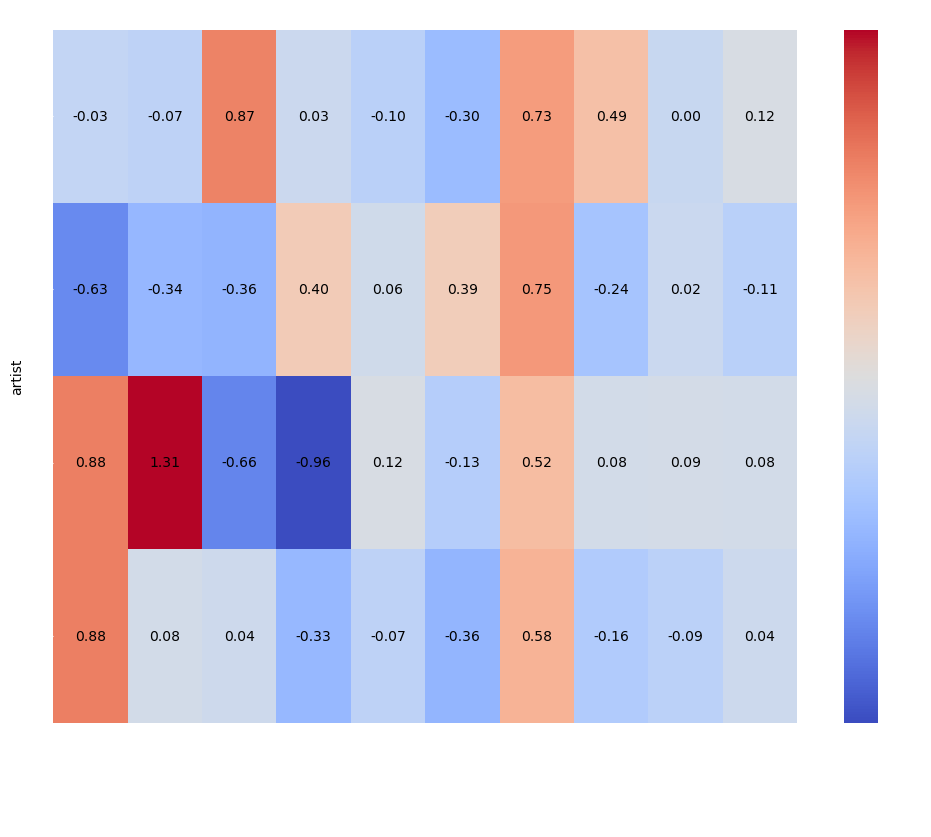

In [177]:
# Creating a new DataFrame with only the columns to visualize
heatmap_data = grouped_df[columns_to_visualize]

# Setting the artist names as the index
heatmap_data.index = grouped_df['artist']

# Creating the heatmap with a transparent background
plt.figure(figsize=(12, 9), facecolor='none')  # Set facecolor to 'none' for transparency

# Create the heatmap
ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"color":"black"})

# Setting the title with white color text
plt.title('Features Heatmap', color='white')

# Setting tick labels color to white
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Change tick colors for both axes to white
ax.tick_params(colors='white', which='both')  # 'both' changes both x and y axis ticks

# Adjust colorbar tick labels to white
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Save the figure with a transparent background and then show it
plt.savefig('heatmap_transparent_background.png', transparent=True, dpi=300)
plt.show()

In [172]:
# Creating the heatmap with a transparent background and black annotations
# plt.figure(figsize=(8, 6), facecolor='none')  # Set facecolor to 'none' for transparency
# ax = sns.heatmap(grouped_df, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"color":"black"})


# Selecting columns to visualize in the heatmap
# Adjust the column list as per your requirements
columns_to_visualize = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness_norm', 'speechiness', 'tempo', 'score']

# Creating a new DataFrame with only the columns to visualize
heatmap_data = grouped_df[columns_to_visualize]

# Setting the album names as the index (if desired)
heatmap_data.index = grouped_df['artist']

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Heatmap')
plt.xticks(rotation=45)
plt.show()

# Change the color of the axes labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Change tick colors for both axes
ax.tick_params(colors='white', which='both')  # 'both' changes both x and y axis ticks

# Adjust colorbar tick labels to white
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.show()

# Save the figure with a transparent background
plt.savefig('heatmap_transparent_background.png', transparent=True, dpi=300)


ValueError: could not convert string to float: 'Doja Cat'

In [161]:
plt.savefig('heatmap_transparent_background.png', transparent=True, dpi=300)

<Figure size 640x480 with 0 Axes>

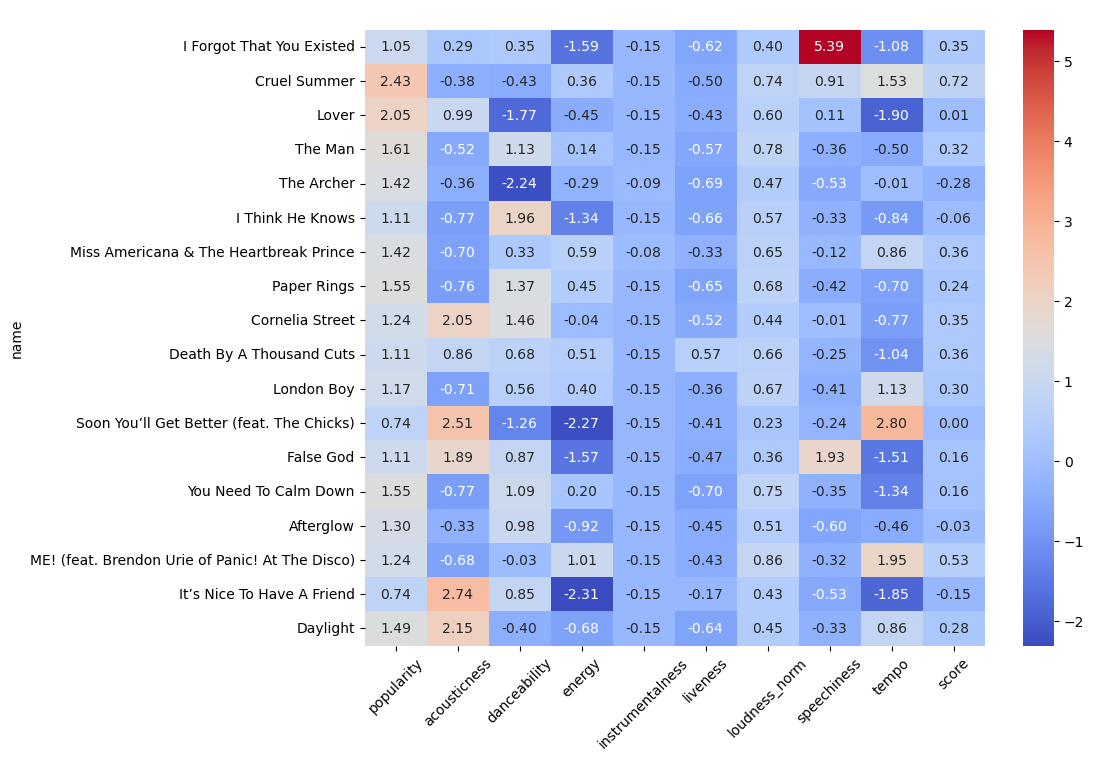

In [162]:
# Filter the DataFrame for Taylor Swift's albums
taylor_swift_df = pop2[pop2['album'] == 'Lover']


# Selecting columns to visualize in the heatmap
# Adjust the column list as per your requirements
columns_to_visualize = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness_norm', 'speechiness', 'tempo', 'score']

# Creating a new DataFrame with only the columns to visualize
heatmap_data = taylor_swift_df[columns_to_visualize]

# Setting the album names as the index (if desired)
heatmap_data.index = taylor_swift_df['name']

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Taylor Swift Album Features Heatmap')
plt.xticks(rotation=45)
plt.show()

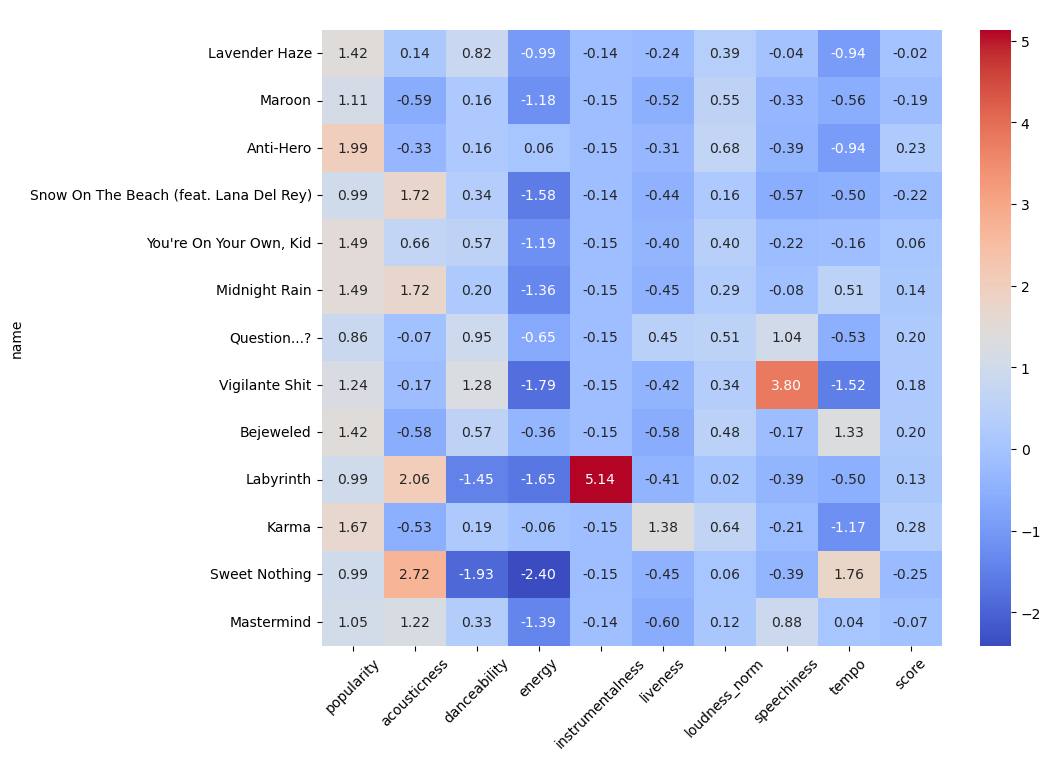

In [163]:
# Filter the DataFrame for Taylor Swift's albums
taylor_swift_df = pop2[pop2['album'] == 'Midnights']


# Selecting columns to visualize in the heatmap
# Adjust the column list as per your requirements
columns_to_visualize = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness_norm', 'speechiness', 'tempo', 'score']

# Creating a new DataFrame with only the columns to visualize
heatmap_data = taylor_swift_df[columns_to_visualize]

# Setting the album names as the index (if desired)
heatmap_data.index = taylor_swift_df['name']

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Taylor Swift Album Features Heatmap')
plt.xticks(rotation=45)
plt.show()

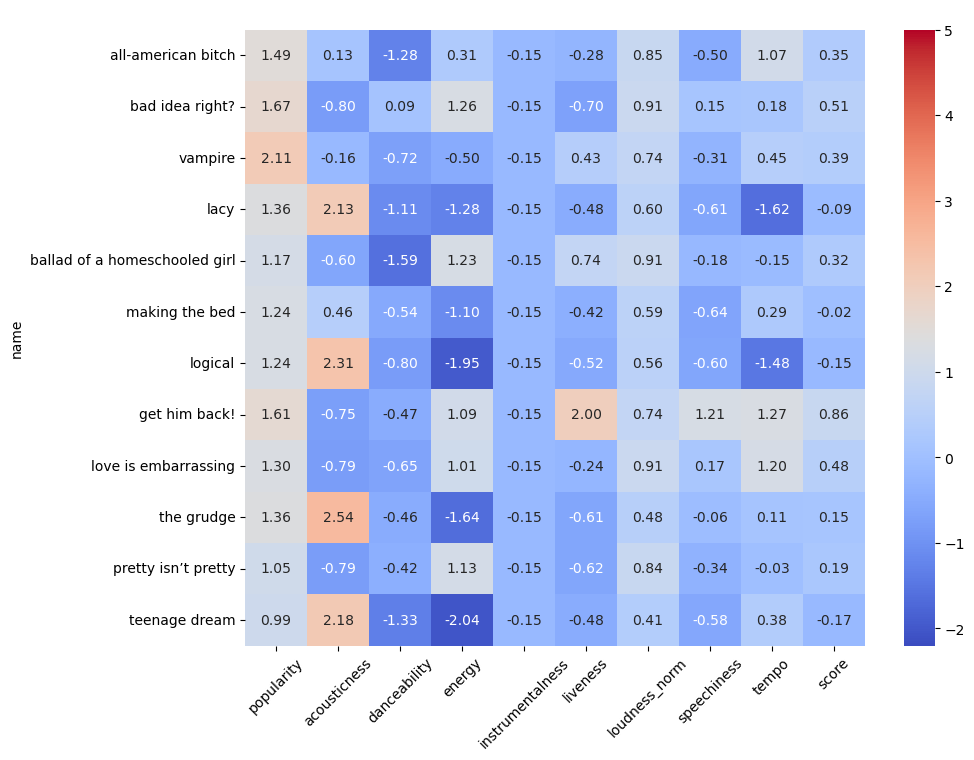

In [164]:
# Filter the DataFrame for Taylor Swift's albums
or_df = pop2[pop2['album'] == 'GUTS']


# Selecting columns to visualize in the heatmap
# Adjust the column list as per your requirements
columns_to_visualize = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness_norm', 'speechiness', 'tempo', 'score']

# Creating a new DataFrame with only the columns to visualize
heatmap_data = or_df[columns_to_visualize]

# Setting the album names as the index (if desired)
heatmap_data.index = or_df['name']

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=5, vmax=-2, fmt=".2f")
plt.title('Olivia Rodgrigo Album Features Heatmap')
plt.xticks(rotation=45)
plt.show()